In [1]:
import numpy as np
import matplotlib.pyplot as plt

import joblib as jl
import os
import seaborn as sns
import glob
import json

## Plotting ODE experiment with the id_x/nid_x

In [19]:
def load_ode_log(path):
    args=json.load(open(os.path.join(path, 'args.json'), 'r'))
    results_ode = []
    results_sim=[]
    for p in glob.glob(os.path.join(path, 'ode*.jl')):
        results_ode.append(jl.load(p))
        
    for p in glob.glob(os.path.join(path, 'sim*.jl')):
        results_sim.append(jl.load(p))
    return args, results_ode, results_sim

def viz_ode(path,i,j):
    def _get_data(result, id_type, key='a'):
        if key is not None:
            Q=result[id_type]['phase2']['Q']
            R=result[id_type]['phase2']['R']
            P=result[id_type]['phase2']['P']
            sim=result[id_type]['phase2']['VSVT']
            vt=result[id_type]['phase2']['VT']
            P_tilde=result[id_type]['phase2']['P_tilde']
        else:
            Q=result[id_type]['Q']
            R=result[id_type]['R']
            P=result[id_type]['P']
            vs=result[id_type]['VS']
            vt=vs
            P_tilde=result[id_type]['P_tilde']            
        return Q,R,P,P_tilde,vt,sim
    
    args, results_ode, results_sim = load_ode_log(path)
    seeds = args['seeds']
    fig, axs = plt.subplots(figsize=(20,16), nrows=4, ncols=4)
    for result in results_ode:
        Q,R,P,P_tilde,vt_id, sim = _get_data(result, 'id')
        axs[0,0].plot(Q[:,i,j], )
        axs[0,0].set_title(f'Q {i,j} -id')
        axs[0,1].plot(R[:,i,j], )
        axs[0,1].set_title(f'R {i,j} -id')
        axs[0,2].plot(np.log(abs(sim)))
        axs[0,2].set_title(f'VSVT similarity -id')
        axs[0,3].plot(P_tilde, )
        axs[0,3].set_title(f'P composite - id')
        
        for k in range(4):
            axs[1,k].plot(P[:,k],)
            axs[1,k].set_title(f'P{k} -id')

        
        Q,R,P,P_tilde,vt_nid, sim = _get_data(result, 'nid')
        axs[2,0].plot(Q[:,i,j], )
        axs[2,0].set_title(f'Q {i,j}-nid')
        axs[2,1].plot(R[:,i,j], )
        axs[2,1].set_title(f'R {i,j}-nid')
        axs[2,2].plot(np.log(abs(sim)) )
        axs[2,2].set_title(f'VSVT similarity-nid')
        axs[2,3].plot(P_tilde, )
        axs[2,3].set_title(f'P composite-nid')
        
        
        for k in range(4):
            axs[3,k].plot(P[:,k], )
            axs[3,k].set_title(f'P{k} -nid')
            
    for result in results_sim:
        Q,R,P,P_tilde,vt_id, sim = _get_data(result, 'id', None)
        axs[0,0].plot(Q[:,i,j], ls='--')
        axs[0,0].set_title(f'Q {i,j} -id')
        axs[0,1].plot(R[:,i,j],ls='--' )
        axs[0,1].set_title(f'R {i,j} -id')
        axs[0,2].plot(np.log(abs(sim)),ls='--')
        axs[0,2].set_title(f'VSVT similarity -id')
        axs[0,3].plot(P_tilde, ls='--' )
        axs[0,3].set_title(f'P composite - id')
        
        for k in range(4):
            axs[1,k].plot(P[:,k], ls='--')
            axs[1,k].set_title(f'P{k} -id')

        
        Q,R,P,P_tilde,vt_nid,sim = _get_data(result, 'nid', None)
        axs[2,0].plot(Q[:,i,j],ls='--' )
        axs[2,0].set_title(f'Q {i,j}-nid')
        axs[2,1].plot(R[:,i,j],ls='--' )
        axs[2,1].set_title(f'R {i,j}-nid')
        axs[2,2].plot(np.log(abs(sim)), ls='--')
        axs[2,2].set_title(f'VSVT similarity-nid')
        axs[2,3].plot(P_tilde,ls='--')
        axs[2,3].set_title(f'P composite-nid')
        
        
        for k in range(4):
            axs[3,k].plot(P[:,k], ls='--')
            axs[3,k].set_title(f'P{k} -nid')
    plt.suptitle(f"lr_v :{args['lr_v']}, lr_w :{args['lr_ws'][1]}, v_angle :{args['v_angle']}, \
                 vt_weight :{args['vt_weight']}, v_std:{args['v_std']}, vt:{vt_id}")

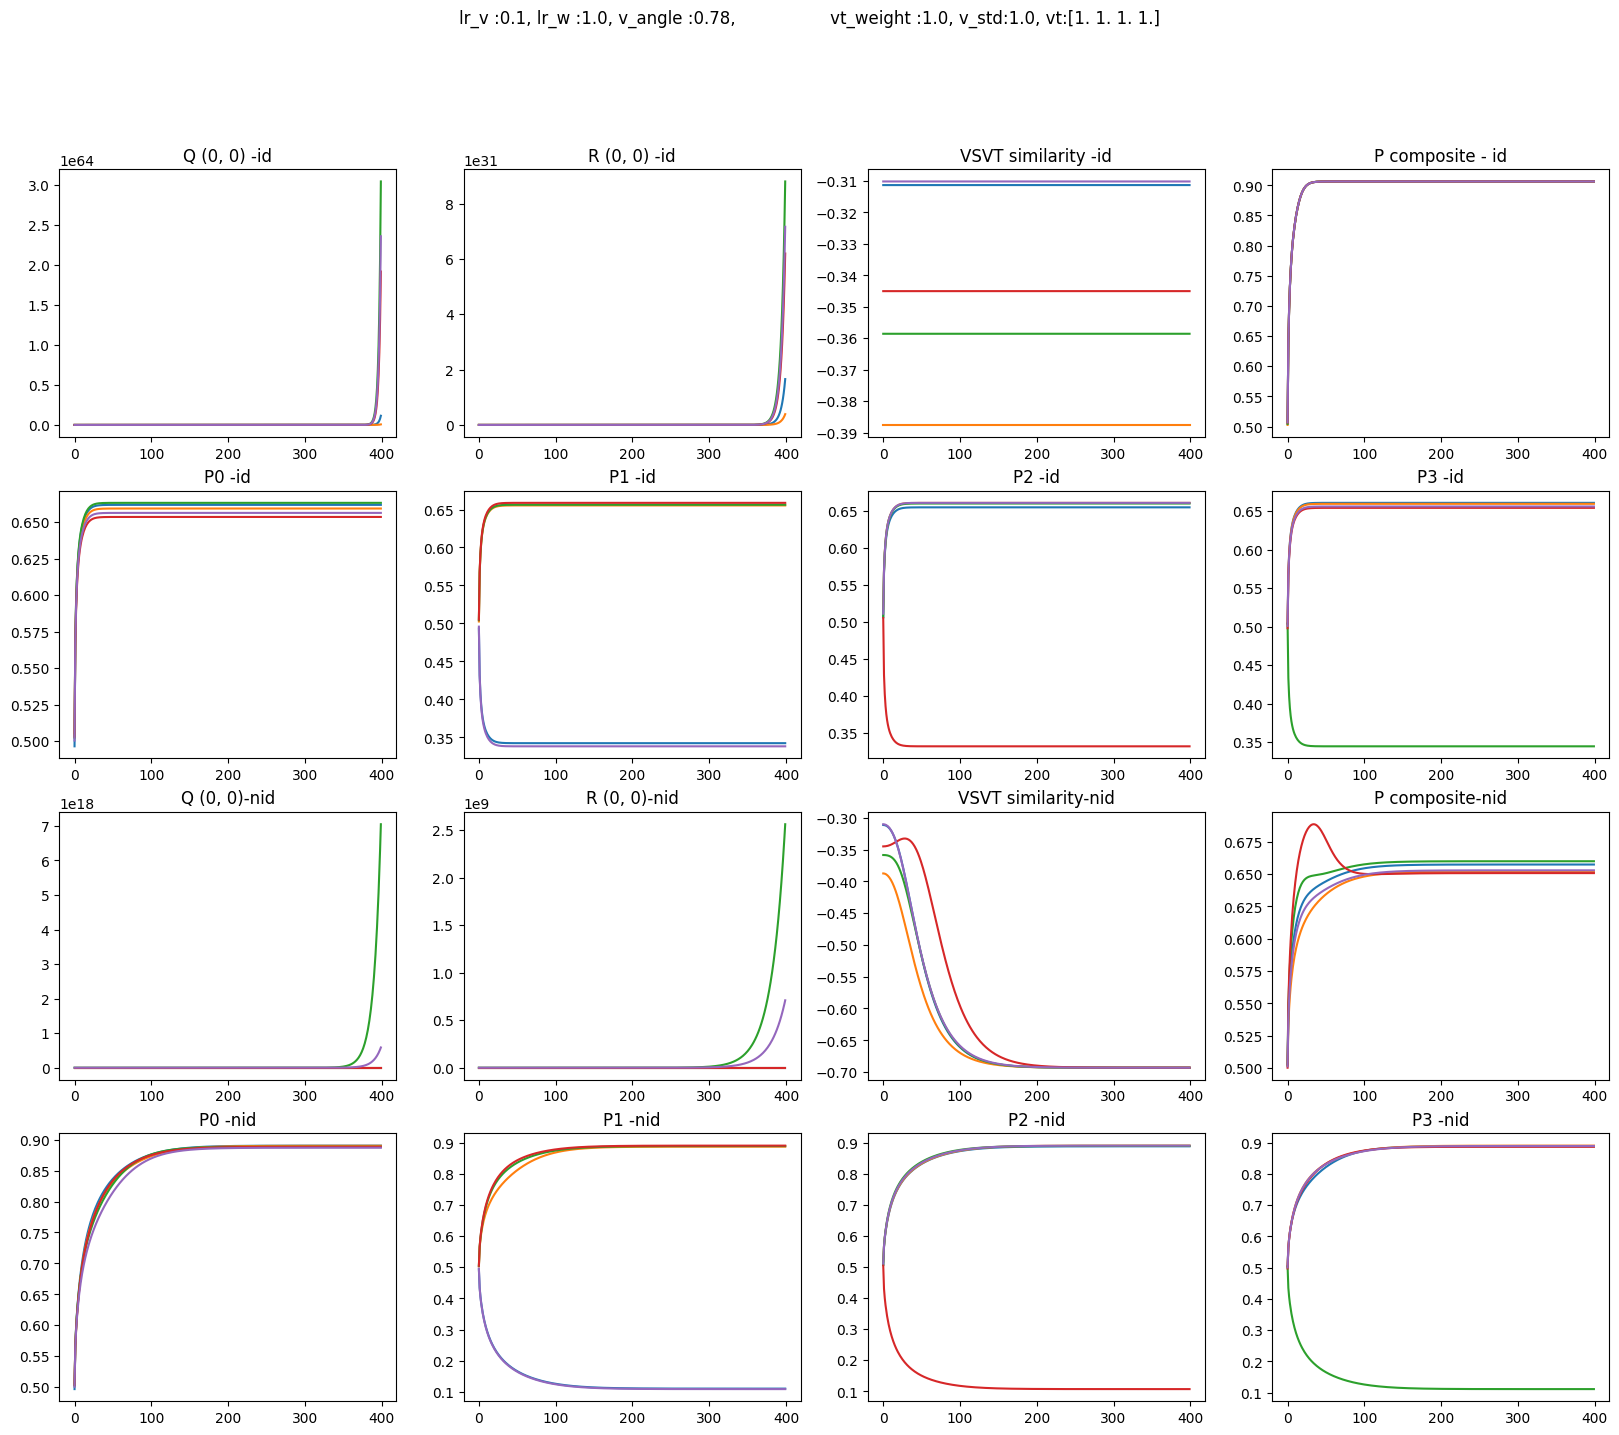

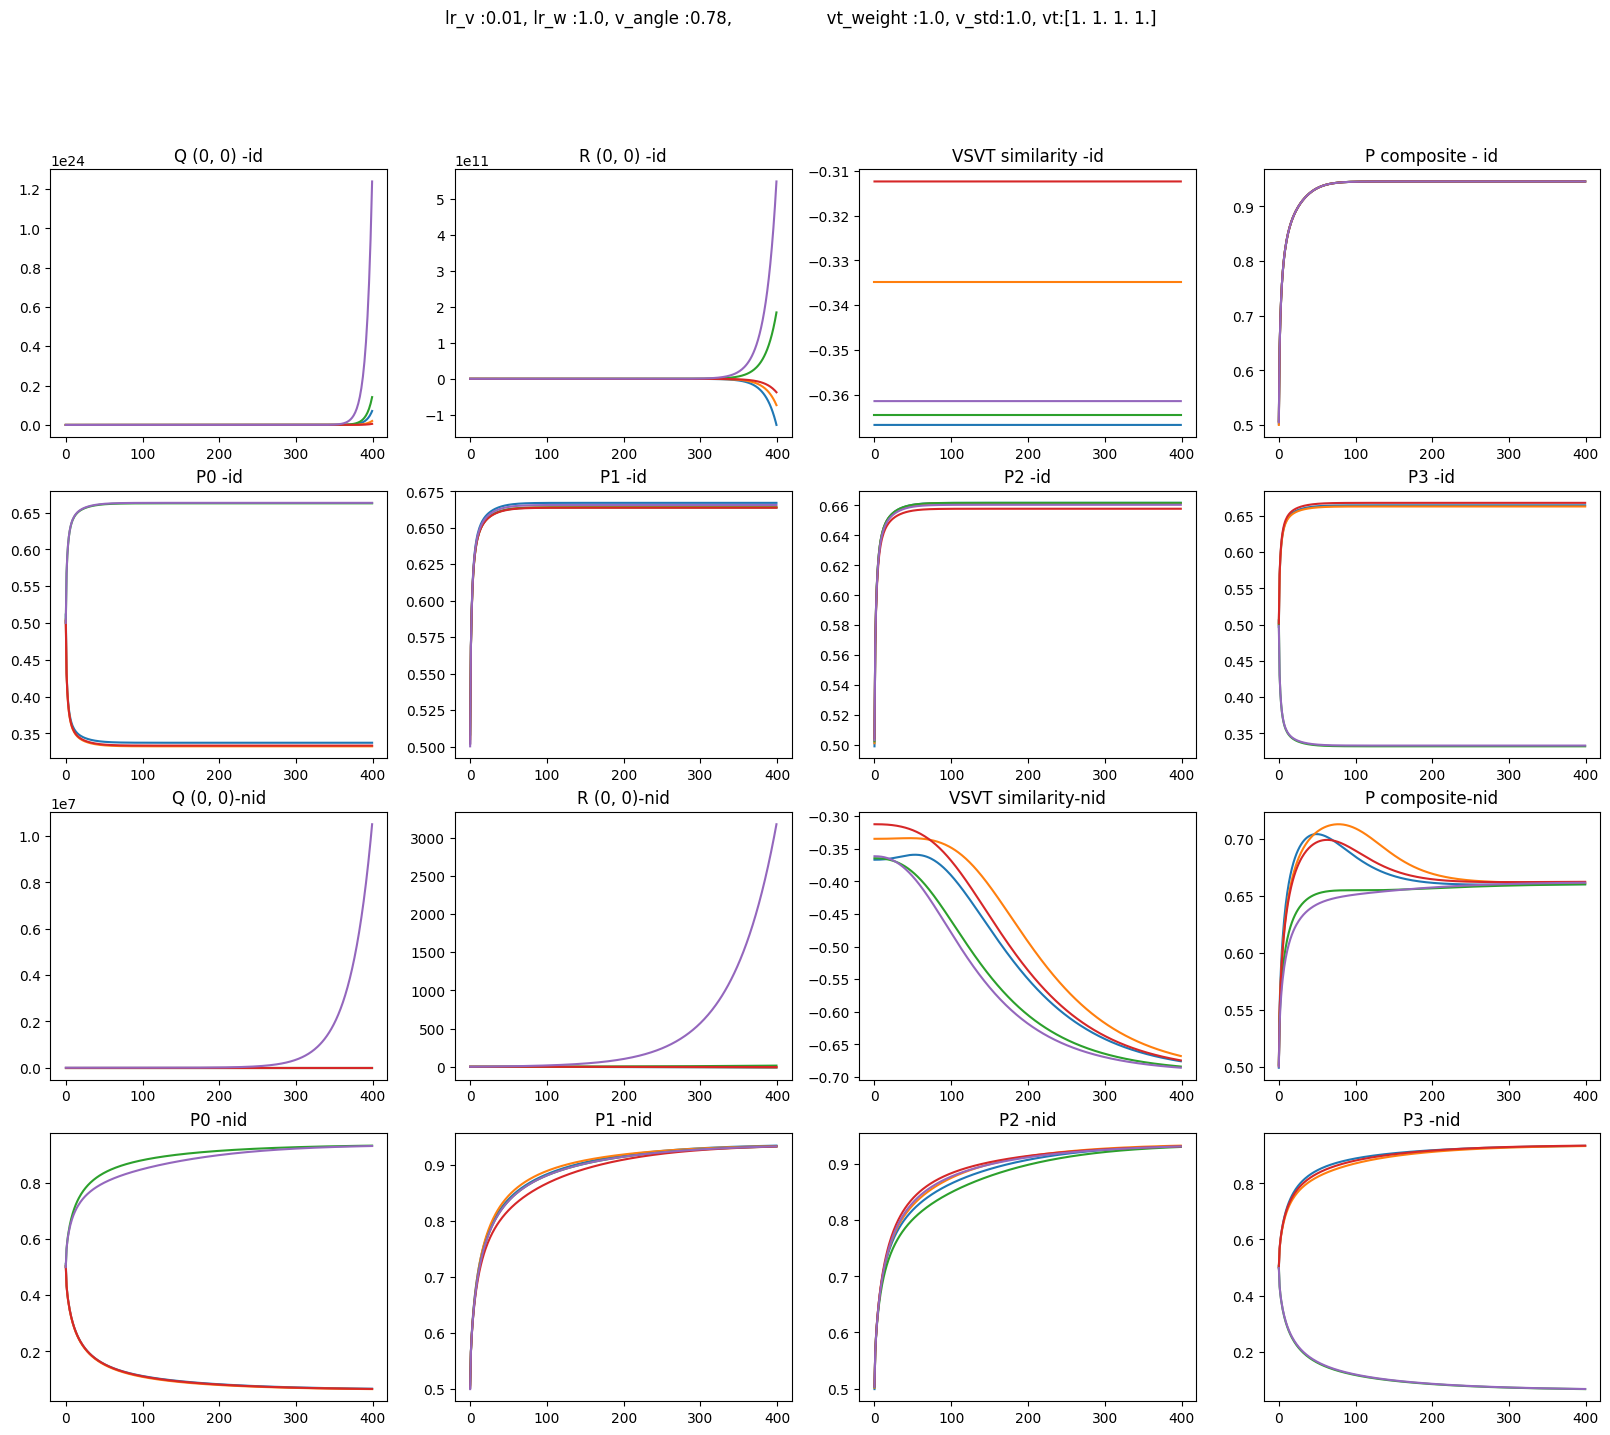

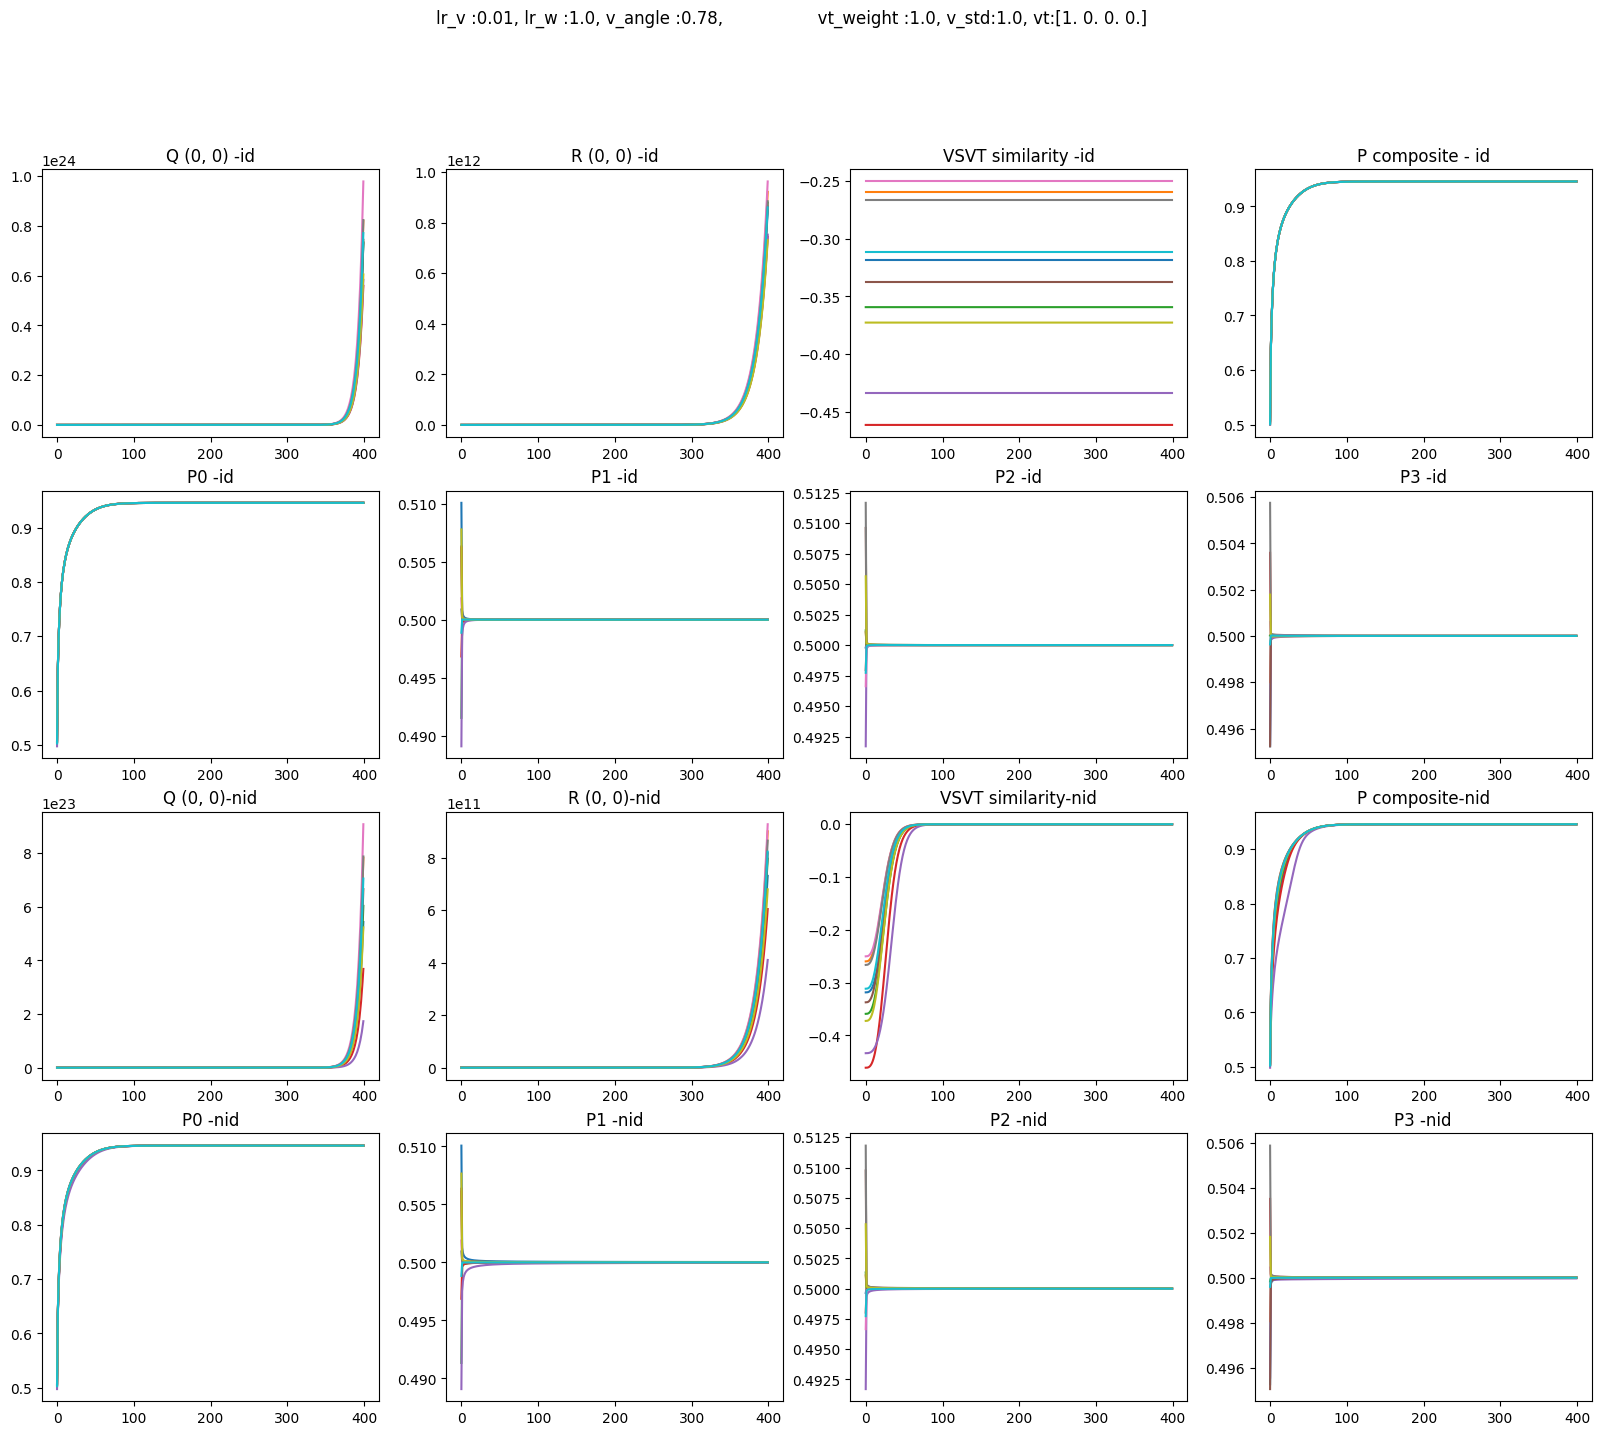

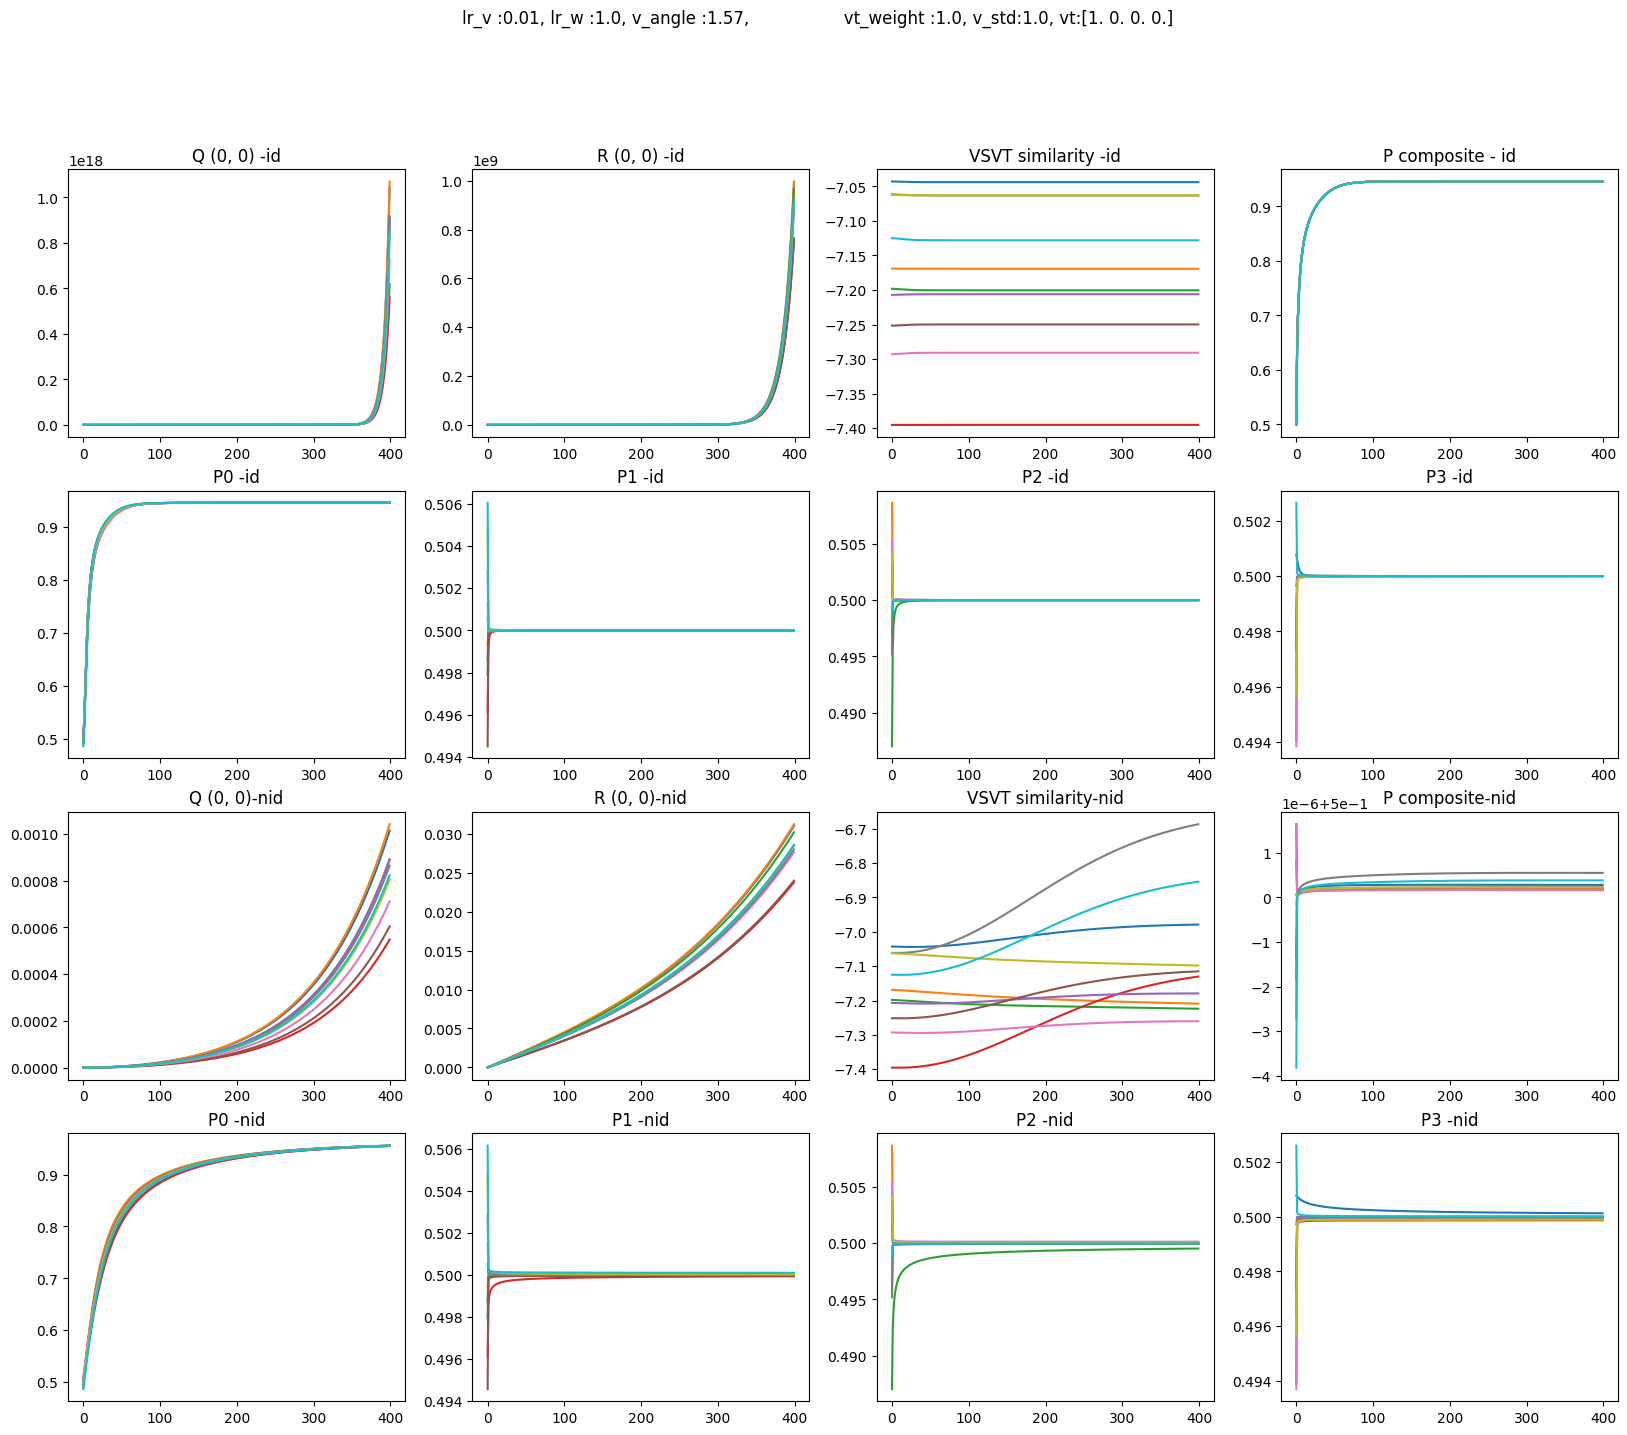

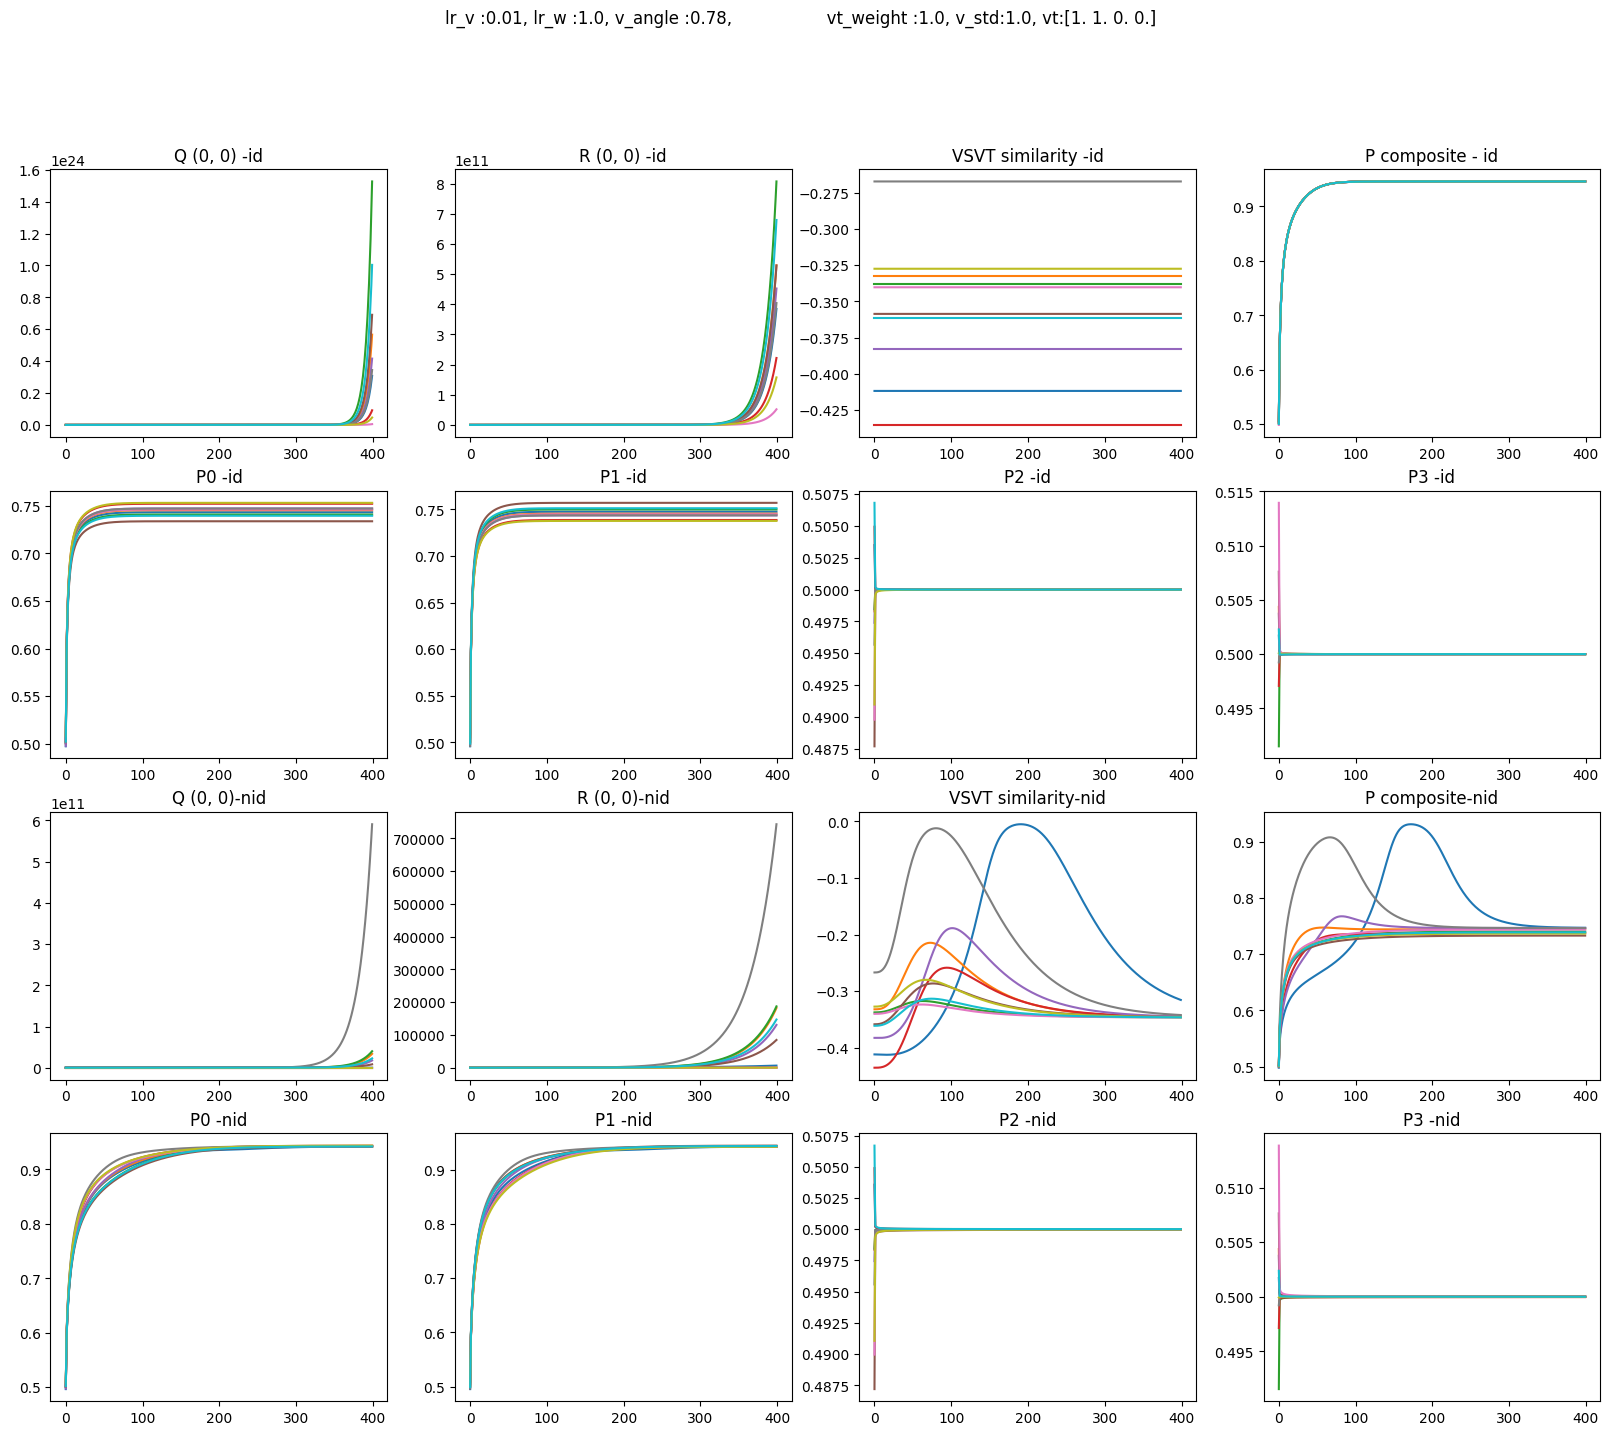

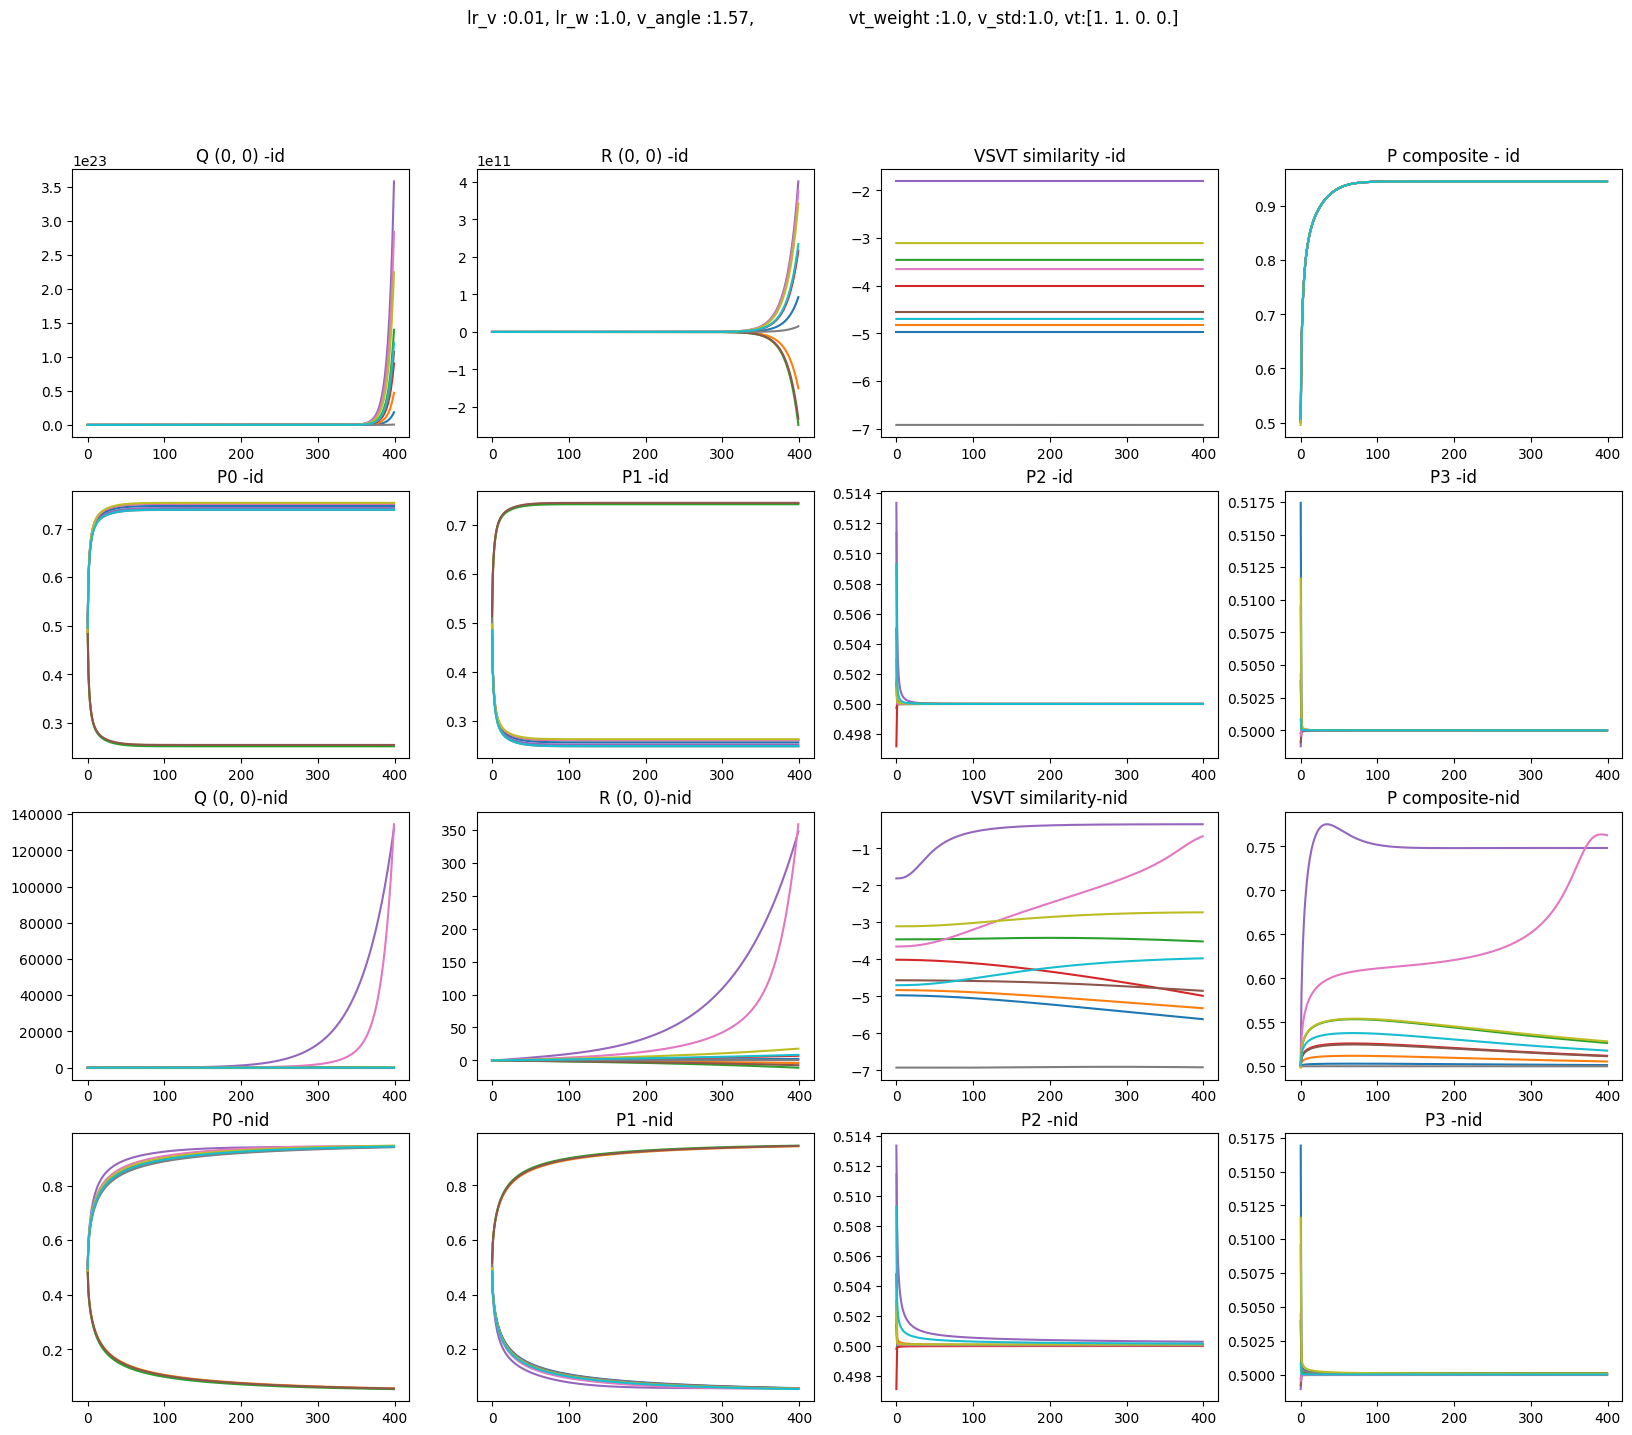

In [20]:
for p in glob.glob('hrl_ode_logs/baseline_160824_VTimportance/20230818*'):
    args=json.load(open(os.path.join(p, 'args.json'), 'r'))
    if args['v_std']==1:
        viz_ode(p, 0,0)

In [ ]:
def load_log(path):
    args=json.load(open(os.path.join(path, 'args.json'), 'r'))
    results_ode = []
    results_simul=[]
    for p in glob.glob(os.path.join(path, 'ode*.jl')):
        results_ode.append(jl.load(p))
    for p in glob.glob(os.path.join(path, 'simul*.jl')):
        if 'weight' not in p:
            results_simul.append(jl.load(p))
    return args, results_ode, results_simul
    
    
def viz_each_task(logpath,k):
    _ode=False
    _simul=False

    def _get_data(result):
        Qmat=result['phase2']['Q']
        Rmat=result['phase2']['R']
        Pmat=result['phase2']['P']
        Vmat=result['phase2']['P']
        P_tildemat = result['phase2']['P_tilde']

        QS = [[k[n][n] for k in Qmat] for n in range(4)]
        RS = [[k[n][n] for k in Rmat] for n in range(4)]
        PS = [[k[n] for k in Pmat]for n in range(4)]
        VS = [[k[n] for k in Vmat]for n in range(4)]
        
        return QS, RS, PS, VS, P_tildemat

    
    args, results_ode, results_simul = load_log(logpath)
    if len(results_ode) != 0:
        _ode = True
    if len(results_simul) != 0:
        _simul = True
    
    if _ode or _simul:
        fig = plt.figure(figsize=(20,4))
        plt.suptitle(f"{args}, ode:{len(results_ode)} sim:{len(results_simul)}")
        ax1 = plt.subplot(141)
        ax2 = plt.subplot(142)
        ax3 = plt.subplot(143)
        ax4 = plt.subplot(144)
        cs=['r','g', 'b', 'y', 'cyan']
        if _ode:
            QS_list = []
            RS_list = []
            PS_list = []
            VS_list = []
            Ptilde_list = []
            for result in results_ode:
                QS, RS, PS, VS, P_tildemat = _get_data(result)
                QS_list.append(QS)
                RS_list.append(RS)
                PS_list.append(PS)
                VS_list.append(VS)
                Ptilde_list.append(P_tildemat)
            #Ptilde_mean = np.mean(Ptilde_mean, axis=0)
            for i in range(len(results_ode)):
                c=cs[i]
                ode_line, =ax1.plot(QS_list[i][k], label = 'ode', c = c, alpha = 0.5)
                ax2.plot(RS_list[i][k], label = 'ode', c = c, alpha = 0.5)
                ax3.plot(np.power(PS_list[i][k],4), label = 'ode', c = c, alpha = 0.5)
                ax4.plot(np.power(Ptilde_list[i],4), label = 'ode', c= c, alpha=0.5)
            
            ax1.set_title(f'Q')
            ax2.set_title(f'R')
            ax3.set_title(f'P')
            ax4.set_title(f'P_tilde')
                
                
        if _simul:
            QS_list = []
            RS_list = []
            PS_list = []
            VS_list = []
            Ptilde_list = []
            for result in results_simul:
                QS, RS, PS, VS, P_tildemat = _get_data(result)
                QS_list.append(QS)
                RS_list.append(RS)
                PS_list.append(PS)
                VS_list.append(VS)
                Ptilde_list.append(P_tildemat)

            #Ptilde_mean = np.mean(Ptilde_mean, axis=0)

            for i in range(len(results_simul)):
                c=cs[i]
                sim_line, =ax1.plot(QS_list[i][k], label = 'sim', c = c, alpha = 0.5, ls='dashed')
                ax2.plot(RS_list[i][k], label = 'sim', c = c, alpha = 0.5, ls='dashed')
                ax3.plot(np.power(PS_list[i][k],4), label = 'sim', c = c, alpha = 0.5,  ls='dashed')
                ax4.plot(np.power(Ptilde_list[i],4), label = 'sim', c= c, alpha=0.5,  ls='dashed')
            ax1.set_title(f'Q')  
            ax2.set_title(f'R')
            ax3.set_title(f'P')
            ax4.set_title(f'P_tilde')
        
        handles = []
        
        if _ode :
            handles.append(ode_line)
        if _simul :
            handles.append(sim_line)
                      
        ax1.legend(handles=handles)
        
            

In [24]:
np.ones((4))

array([1., 1., 1., 1.])

In [4]:
def viz_each_seed(logpath,seed):
    _ode=False
    _simul=False

    def _get_data(result):
        Qmat=result['phase2']['Q']
        Rmat=result['phase2']['R']
        Pmat=result['phase2']['P']
        Vmat=result['phase2']['P']
        P_tildemat = result['phase2']['P_tilde']

        QS = [[k[n][n] for k in Qmat] for n in range(4)]
        RS = [[k[n][n] for k in Rmat] for n in range(4)]
        PS = [[k[n] for k in Pmat]for n in range(4)]
        VS = [[k[n] for k in Vmat]for n in range(4)]
        
        return QS, RS, PS, VS, P_tildemat

    
    args, results_ode, results_simul = load_log(logpath)
    if len(results_ode) != 0:
        _ode = True
    if len(results_simul) != 0:
        _simul = True
    
    if _ode or _simul:
        fig = plt.figure(figsize=(20,4))
        plt.suptitle(f"{args}, ode:{len(results_ode)} sim:{len(results_simul)}")
        ax1 = plt.subplot(141)
        ax2 = plt.subplot(142)
        ax3 = plt.subplot(143)
        ax4 = plt.subplot(144)
        cs=['r','g', 'b', 'y', 'cyan']
        if _ode:
            result = results_ode[seed]
            QS, RS, PS, VS, P_tildemat = _get_data(result)
            for i in range(len(QS)):
                c=cs[i]
                ode_line, =ax1.plot(QS[i], label = 'ode', c = c, alpha = 0.5)
                ax2.plot(RS[i], label = 'ode', c = c, alpha = 0.5)
                ax3.plot(np.power(PS[i],4), label = 'ode', c = c, alpha = 0.5)
            ax4.plot(np.power(P_tildemat,4), label = 'ode', c= 'gray', alpha=0.5)
            
            ax1.set_title(f'Q')
            ax2.set_title(f'R')
            ax3.set_title(f'P')
            ax4.set_title(f'P_tilde')
                
                
        if _simul:
            result = results_simul[seed]
            QS, RS, PS, VS, P_tildemat = _get_data(result)
            for i in range(len(QS)):
                c=cs[i]
                sim_line, =ax1.plot(QS[i], label = 'sim', c = c, alpha = 0.5,ls = '--')
                ax2.plot(RS[i], label = 'sim', c = c, alpha = 0.5, ls = '--')
                ax3.plot(np.power(PS[i],4), label = 'sim', c = c, alpha = 0.5, ls = '--')
            ax4.plot(np.power(P_tildemat,4), label = 'sim', c= 'gray', alpha=0.5, ls = '--')
            
            ax1.set_title(f'Q')
            ax2.set_title(f'R')
            ax3.set_title(f'P')
            ax4.set_title(f'P_tilde')
        
        handles = []
        
        if _ode :
            handles.append(ode_line)
        if _simul :
            handles.append(sim_line)
                      
        ax1.legend(handles=handles)
        
            

In [11]:
0.7**4

0.24009999999999995

hrl_ode_logs/baseline_VT1/20230801105825.985405
hrl_ode_logs/baseline_VT1/20230801105825.985695
hrl_ode_logs/baseline_VT1/20230801105825.985708
hrl_ode_logs/baseline_VT1/20230801105825.986055
hrl_ode_logs/baseline_VT1/20230801105825.986227
hrl_ode_logs/baseline_VT1/20230801105825.986203
hrl_ode_logs/baseline_VT1/20230801105827.053922
hrl_ode_logs/baseline_VT1/20230801105835.448350
hrl_ode_logs/baseline_VT1/20230801110036.996136
hrl_ode_logs/baseline_VT1/20230801110036.996706
hrl_ode_logs/baseline_VT1/20230801110036.996240
hrl_ode_logs/baseline_VT1/20230801110036.996720
hrl_ode_logs/baseline_VT1/20230801110036.996721
hrl_ode_logs/baseline_VT1/20230801110036.996301
hrl_ode_logs/baseline_VT1/20230801110036.996349
hrl_ode_logs/baseline_VT1/20230801110036.998394
hrl_ode_logs/baseline_VT1/20230801110051.434889
hrl_ode_logs/baseline_VT1/20230801202756.881944
hrl_ode_logs/baseline_VT1/20230801204734.377596
hrl_ode_logs/baseline_VT1/20230801223328.572665
hrl_ode_logs/baseline_VT1/20230801223328

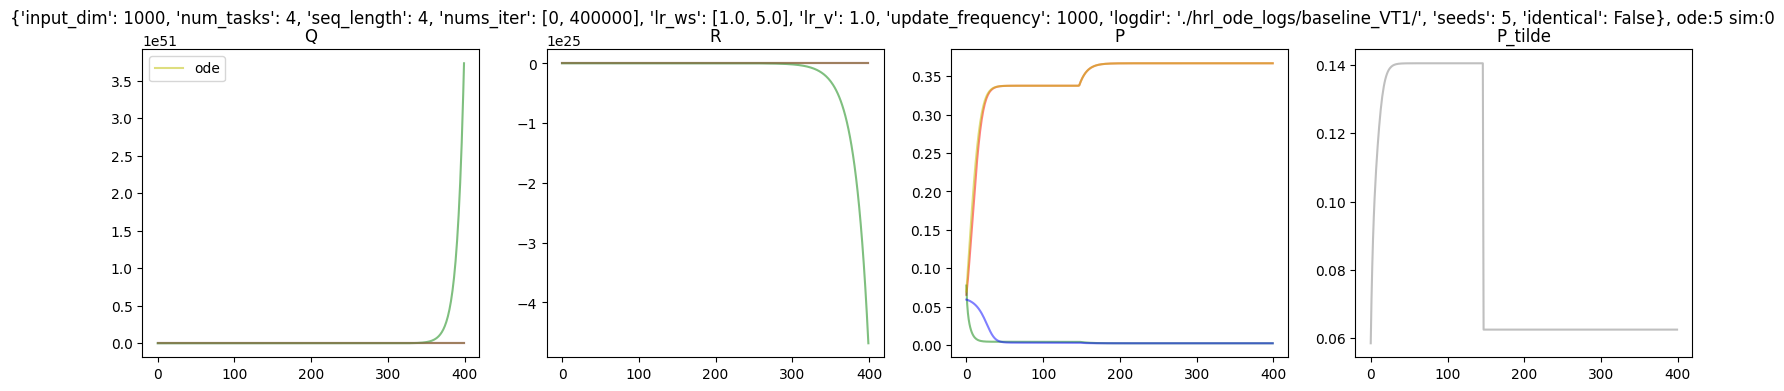

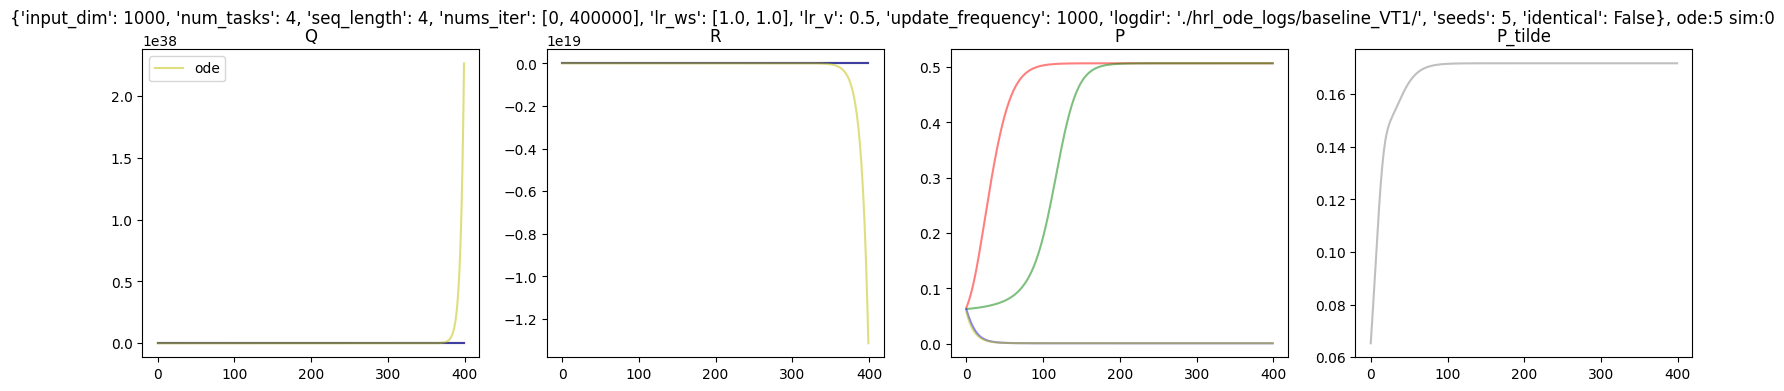

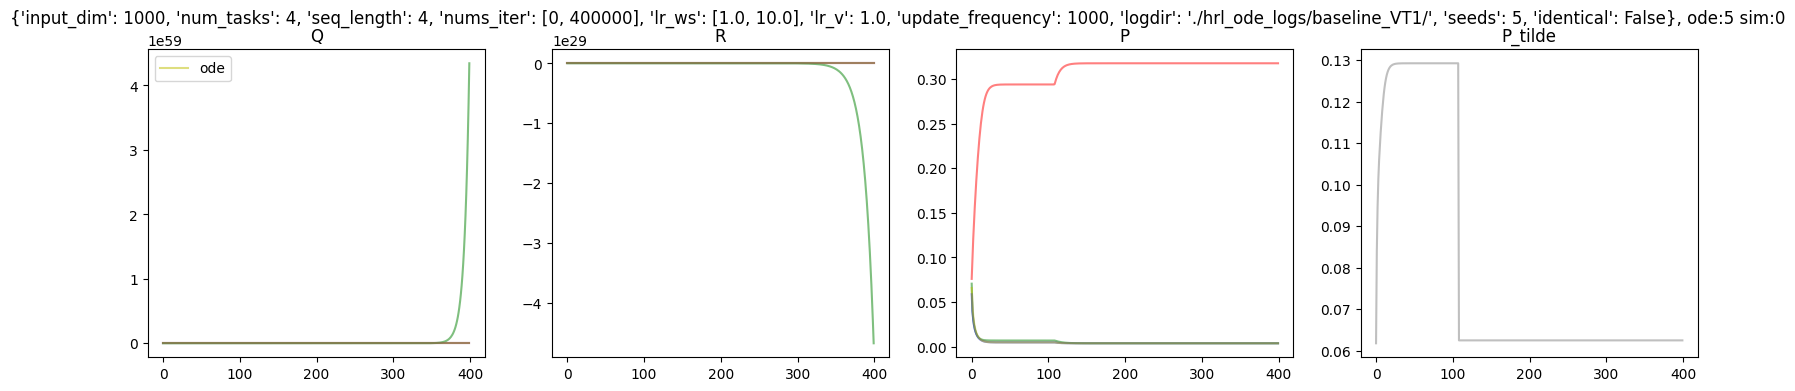

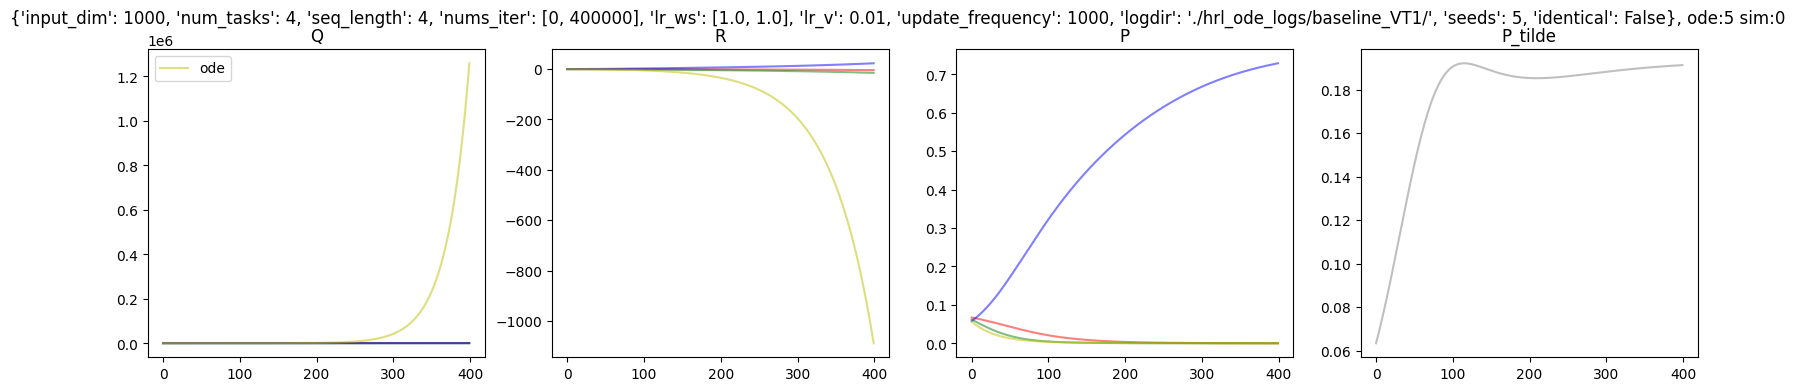

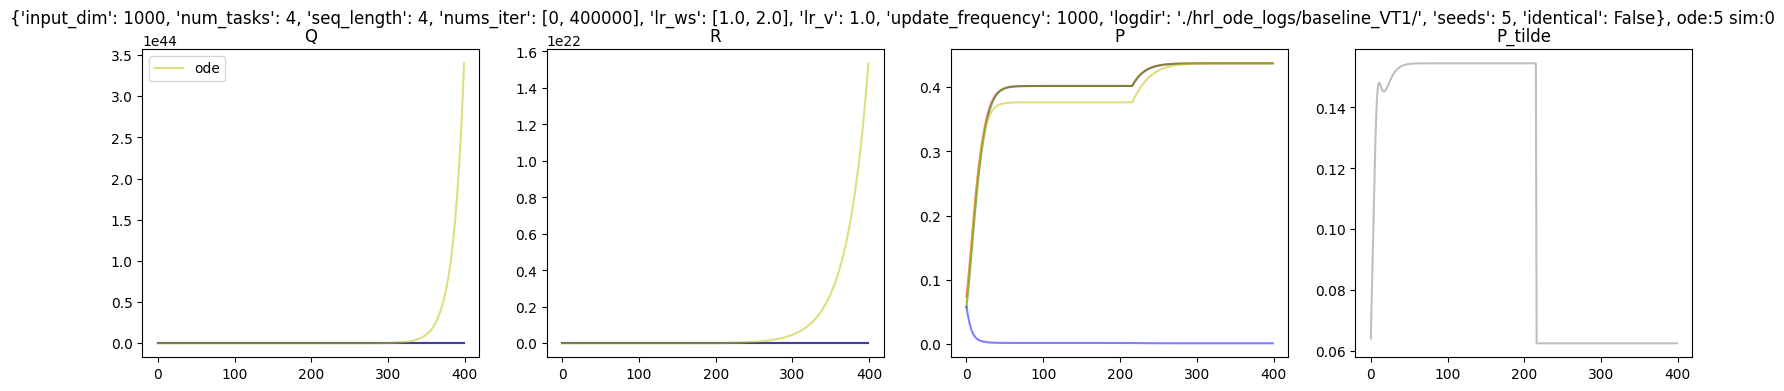

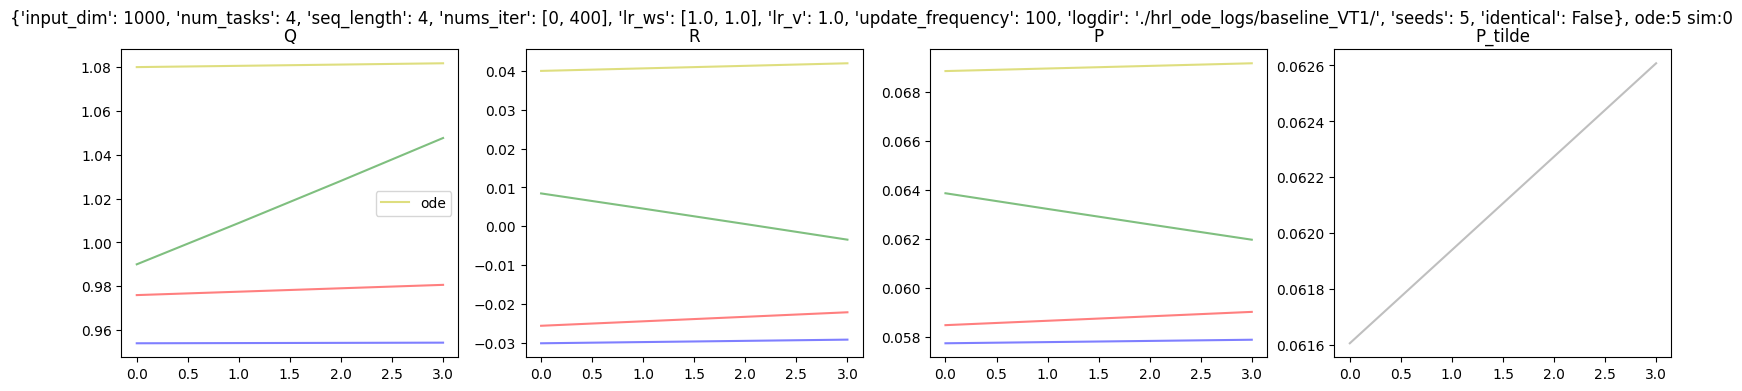

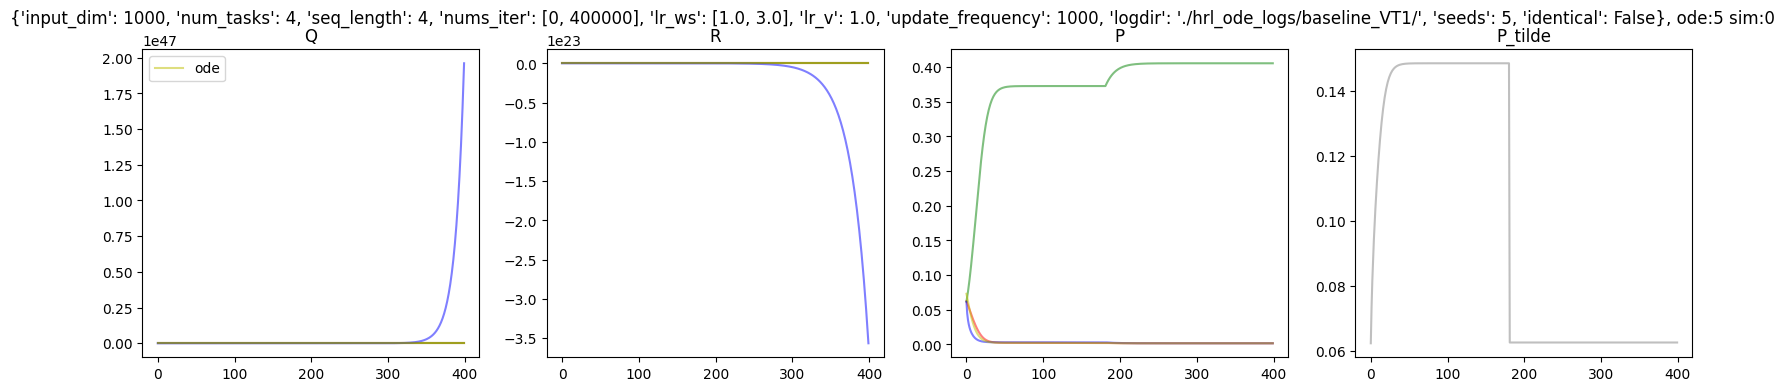

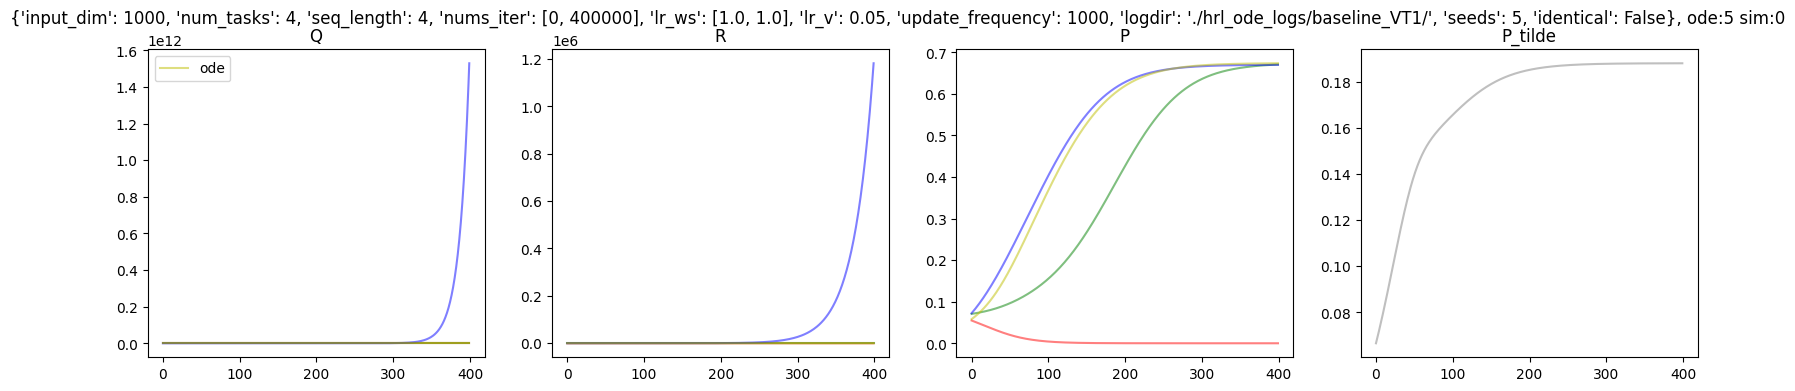

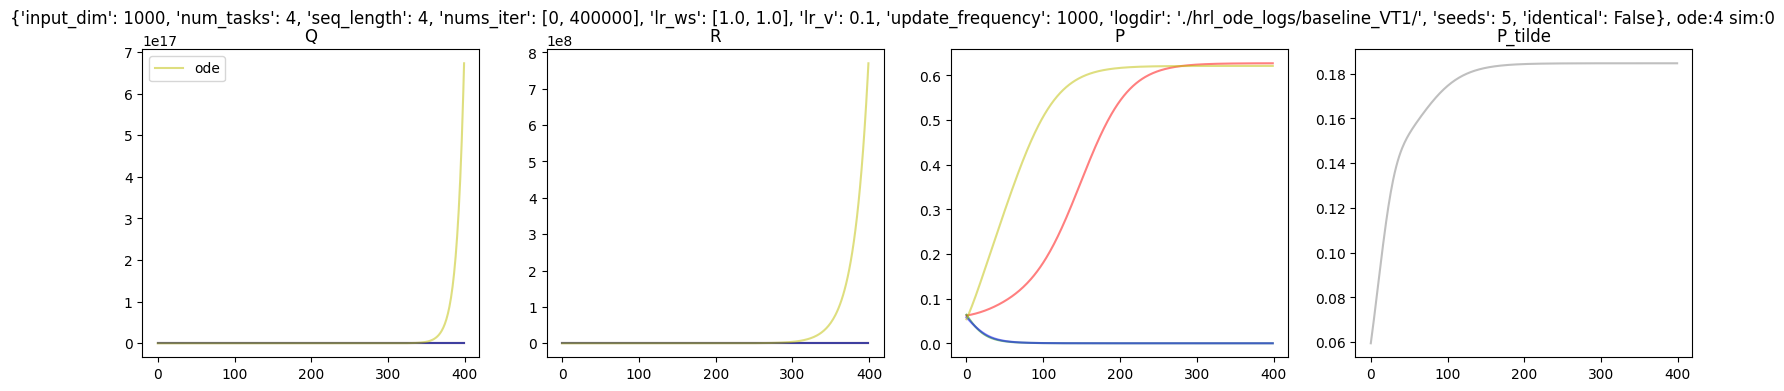

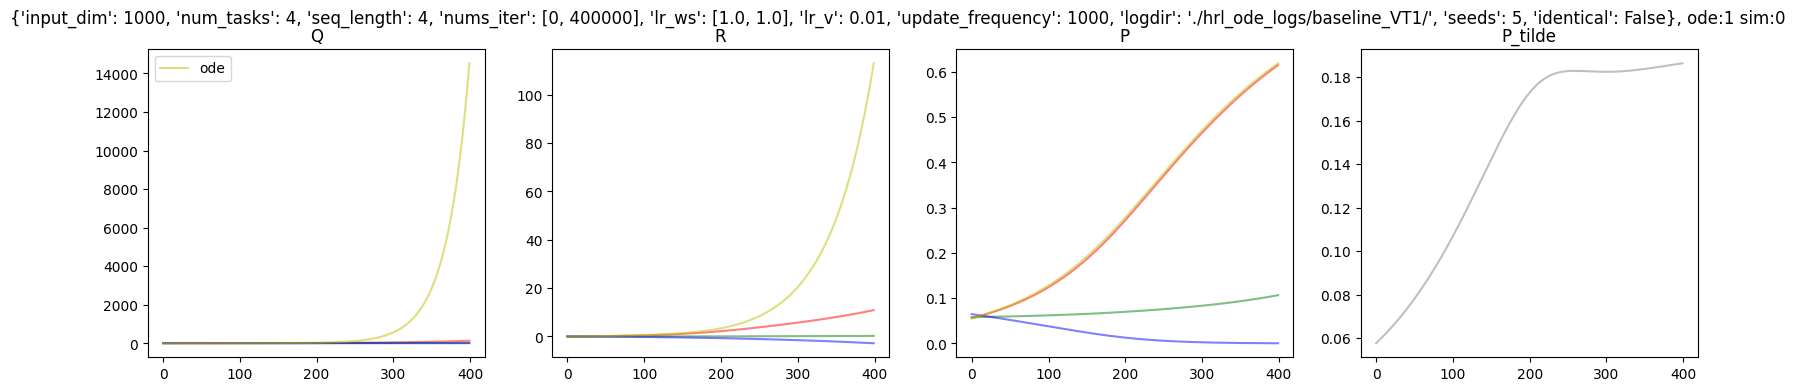

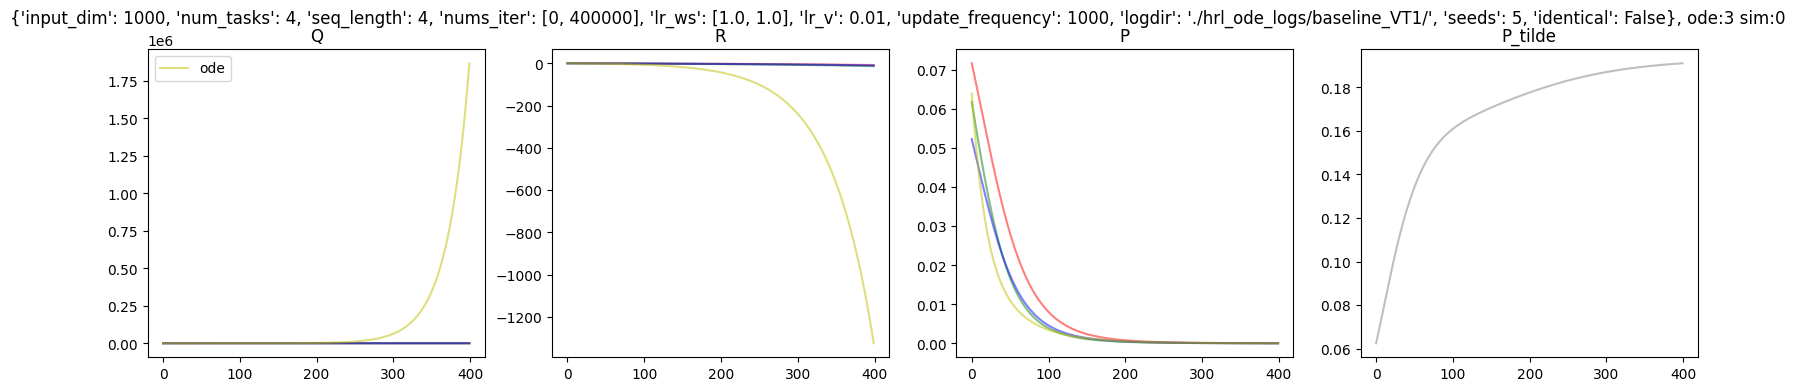

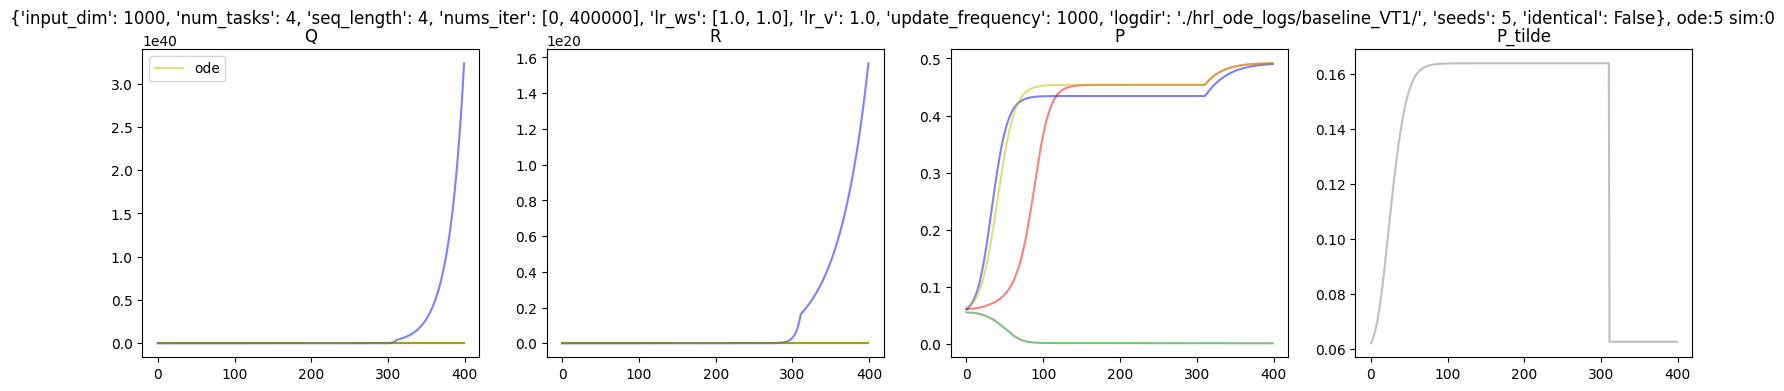

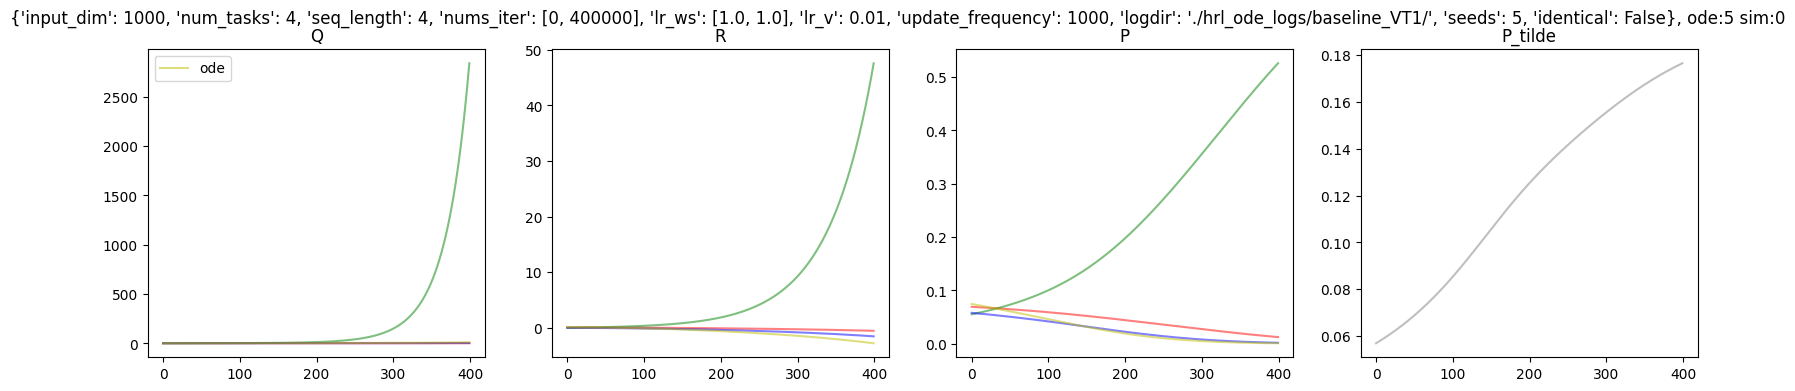

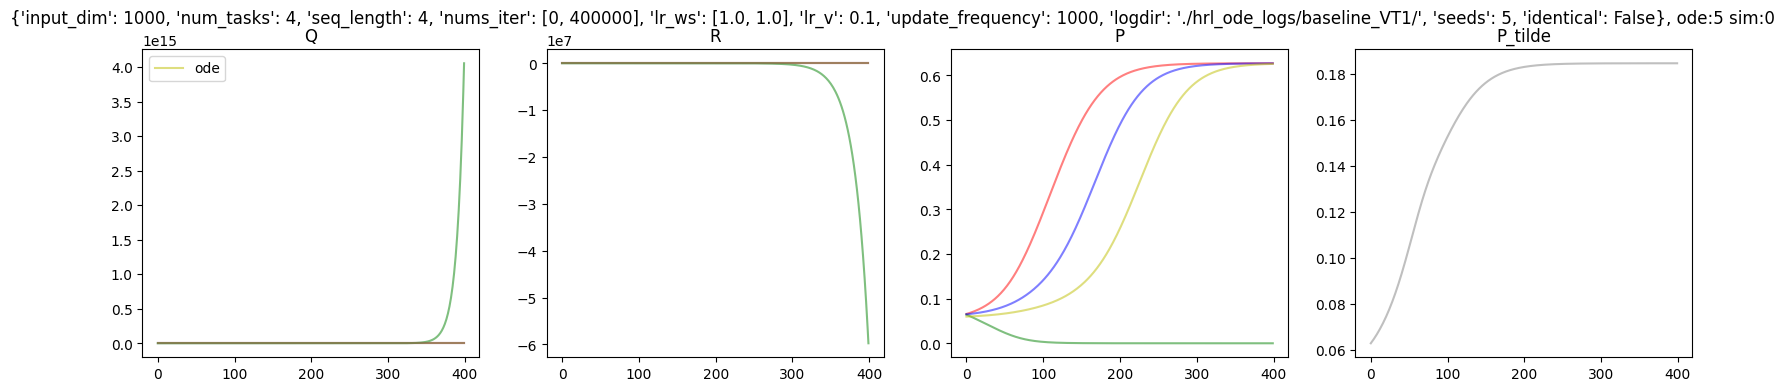

In [7]:
paths=glob.glob('hrl_ode_logs/baseline_identical/')

for p in paths:
        print(p)
        viz_each_seed(p,0)

hrl_ode_simul_logs/curriculum_VT1/20230802145721.978871
hrl_ode_simul_logs/curriculum_VT1/20230802145721.978893
hrl_ode_simul_logs/curriculum_VT1/20230802145722.927553
hrl_ode_simul_logs/curriculum_VT1/20230802145722.927577
hrl_ode_simul_logs/curriculum_VT1/20230802145722.927633
hrl_ode_simul_logs/curriculum_VT1/20230802145722.927636
hrl_ode_simul_logs/curriculum_VT1/20230802145722.927641
hrl_ode_simul_logs/curriculum_VT1/20230802145722.927764
hrl_ode_simul_logs/curriculum_VT1/20230802145722.927794
hrl_ode_simul_logs/curriculum_VT1/20230802145722.927915
hrl_ode_simul_logs/curriculum_VT1/20230802145723.404707
hrl_ode_simul_logs/curriculum_VT1/20230802145723.524522
hrl_ode_simul_logs/curriculum_VT1/20230802145724.231245
hrl_ode_simul_logs/curriculum_VT1/20230802145724.231305
hrl_ode_simul_logs/curriculum_VT1/20230802145724.231458
hrl_ode_simul_logs/curriculum_VT1/20230802173042.126920
hrl_ode_simul_logs/curriculum_VT1/20230802173615.484929
hrl_ode_simul_logs/curriculum_VT1/20230802173736

/tmp/ipykernel_3986459/377620361.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(20,4))


hrl_ode_simul_logs/curriculum_VT1/20230802175322.229875
hrl_ode_simul_logs/curriculum_VT1/20230802175520.250732
hrl_ode_simul_logs/curriculum_VT1/20230802192530.559420
hrl_ode_simul_logs/curriculum_VT1/20230802192755.991843
hrl_ode_simul_logs/curriculum_VT1/20230802201038.313018
hrl_ode_simul_logs/curriculum_VT1/20230802201201.391573


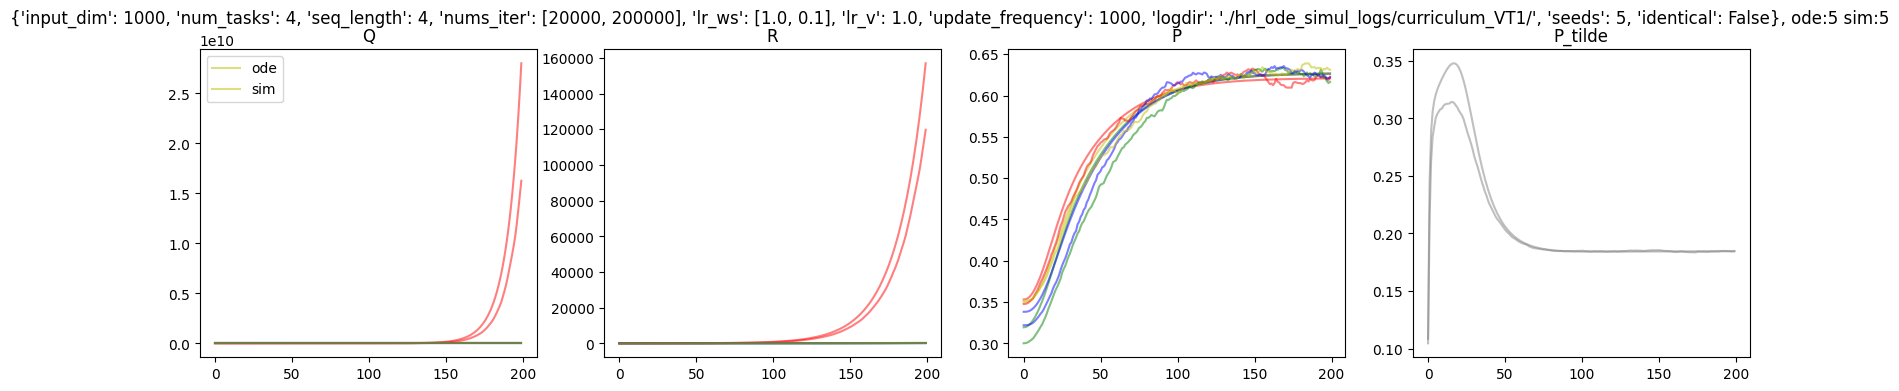

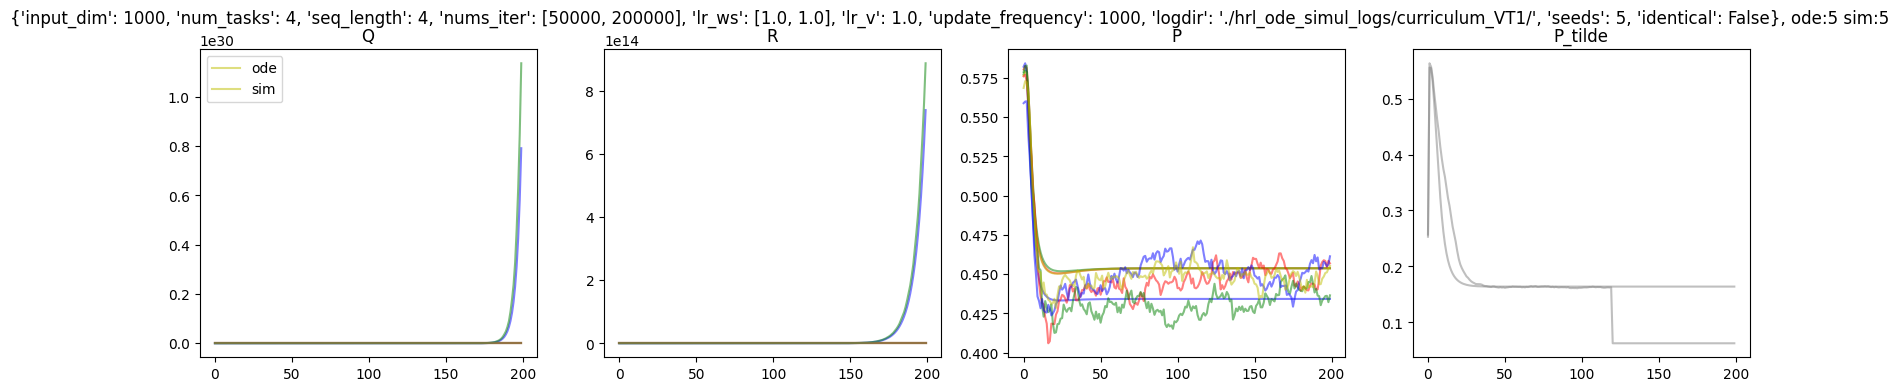

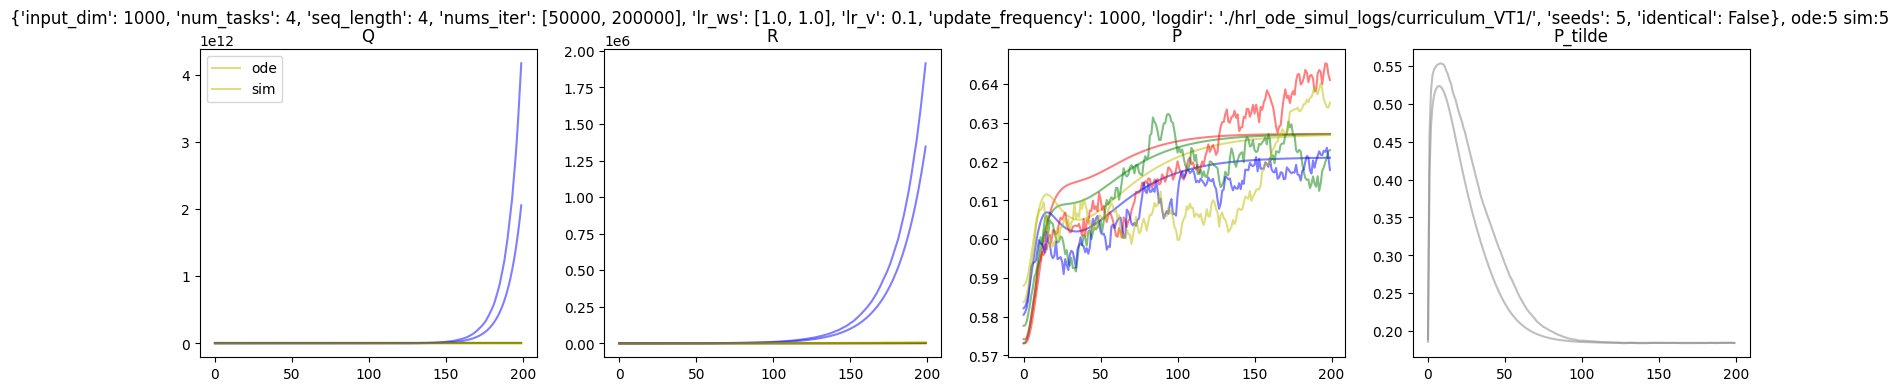

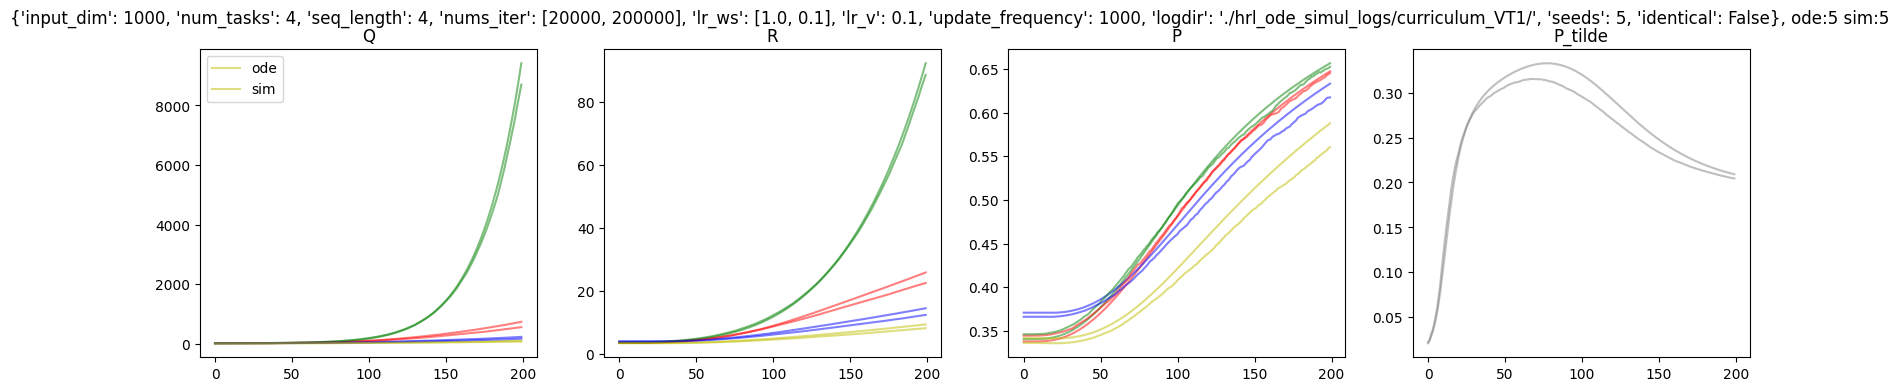

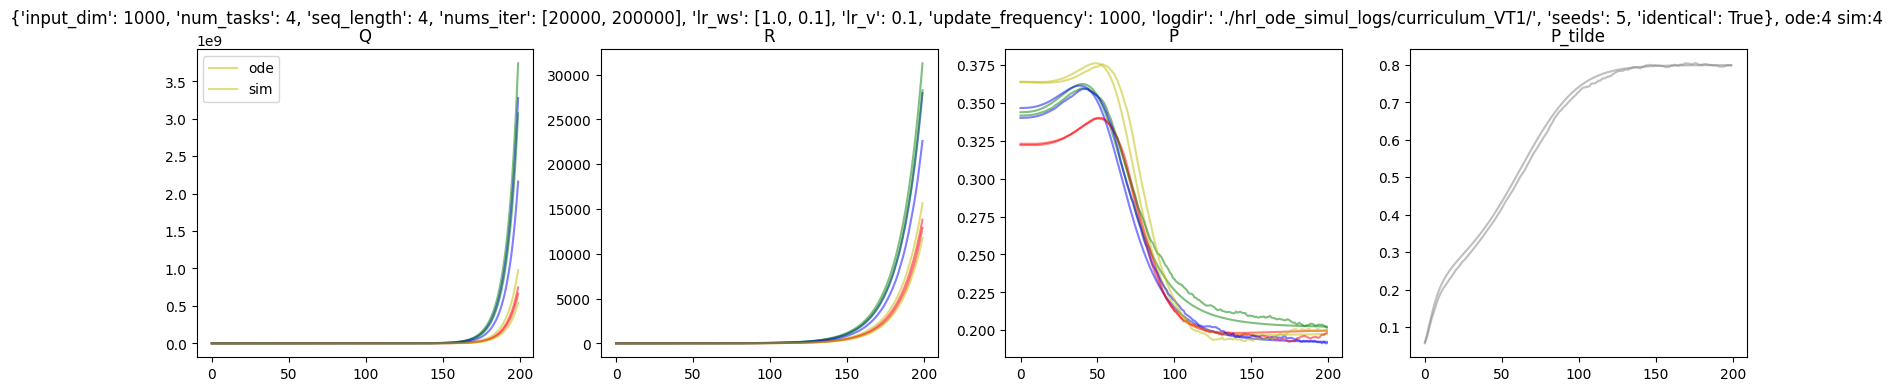

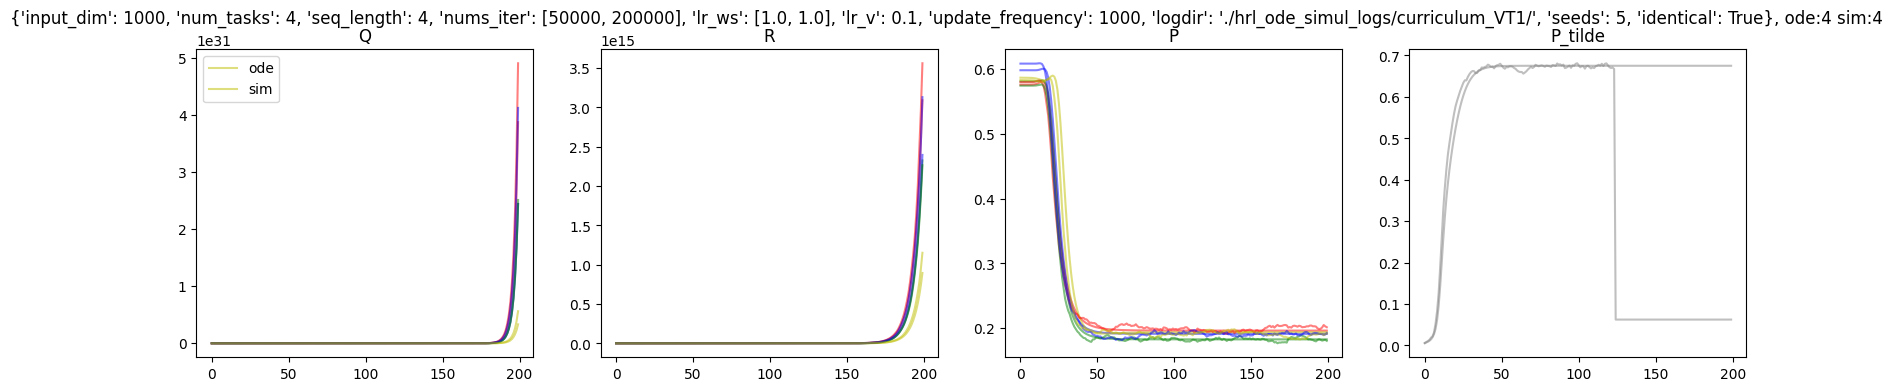

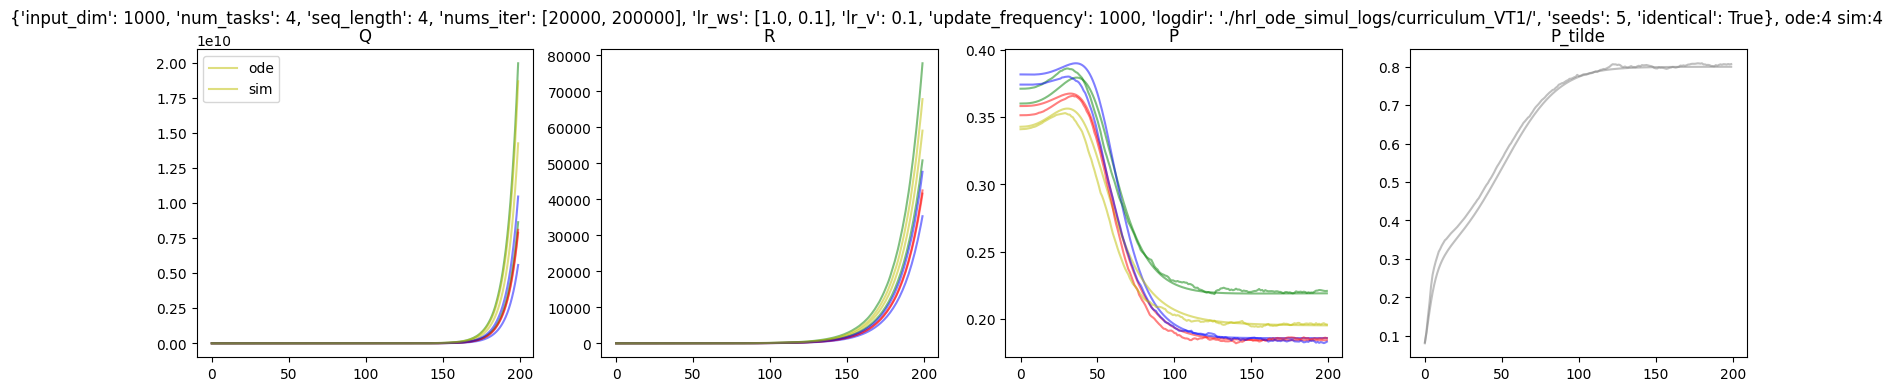

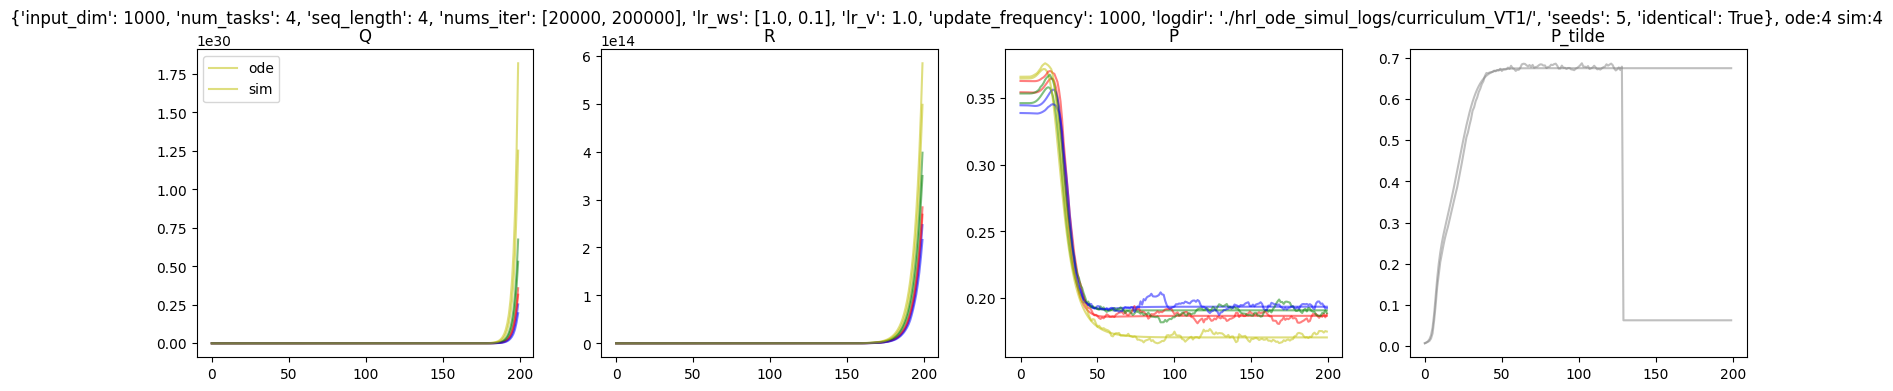

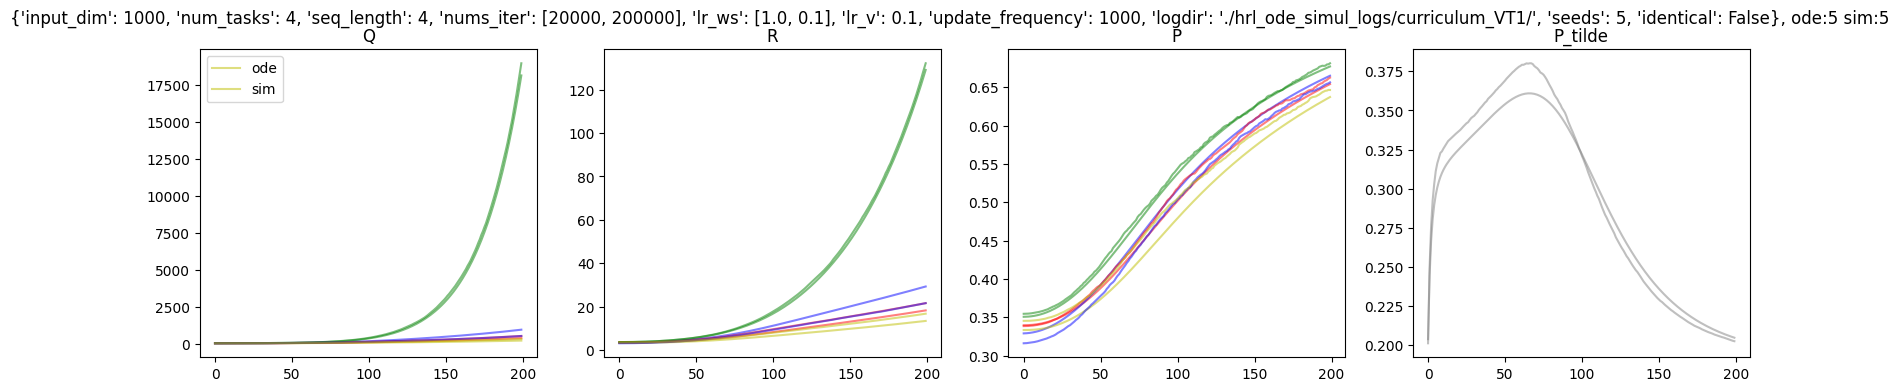

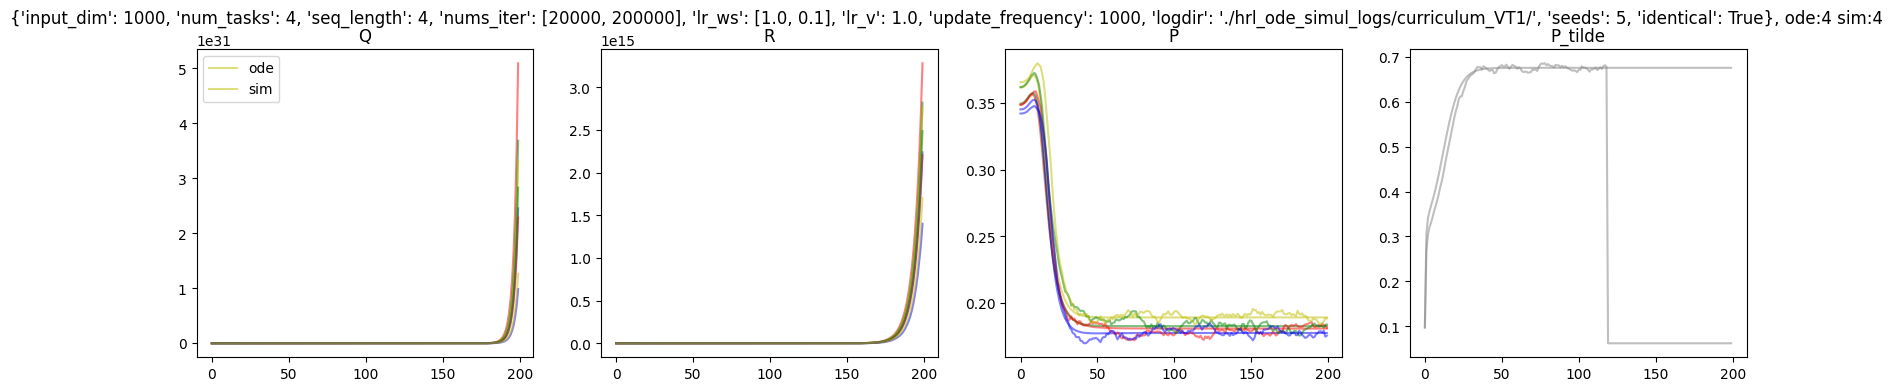

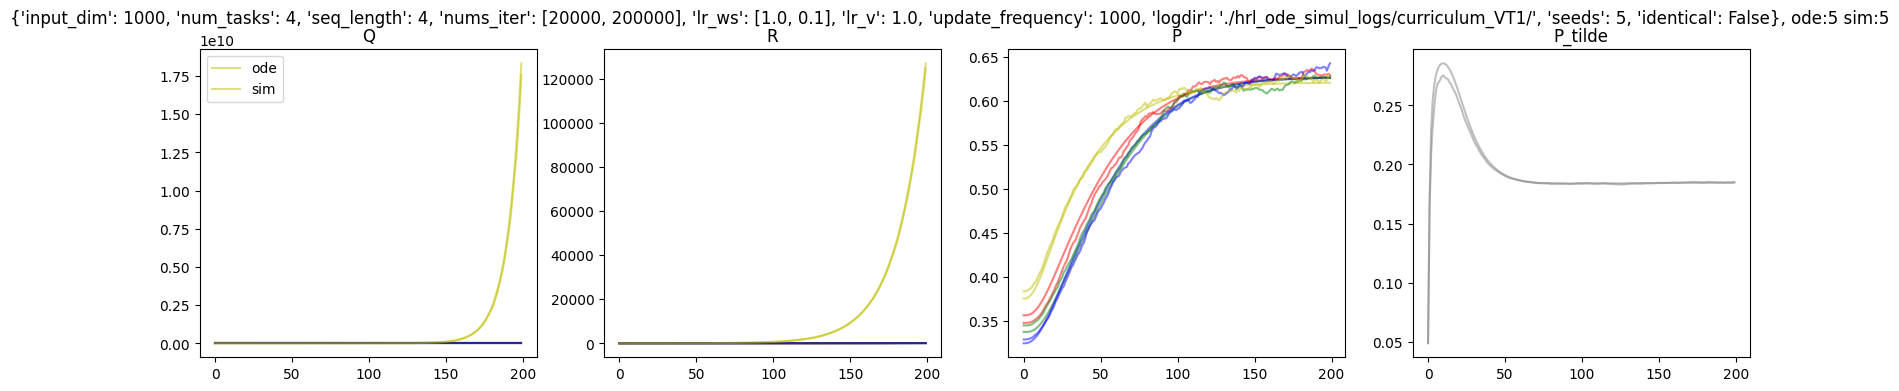

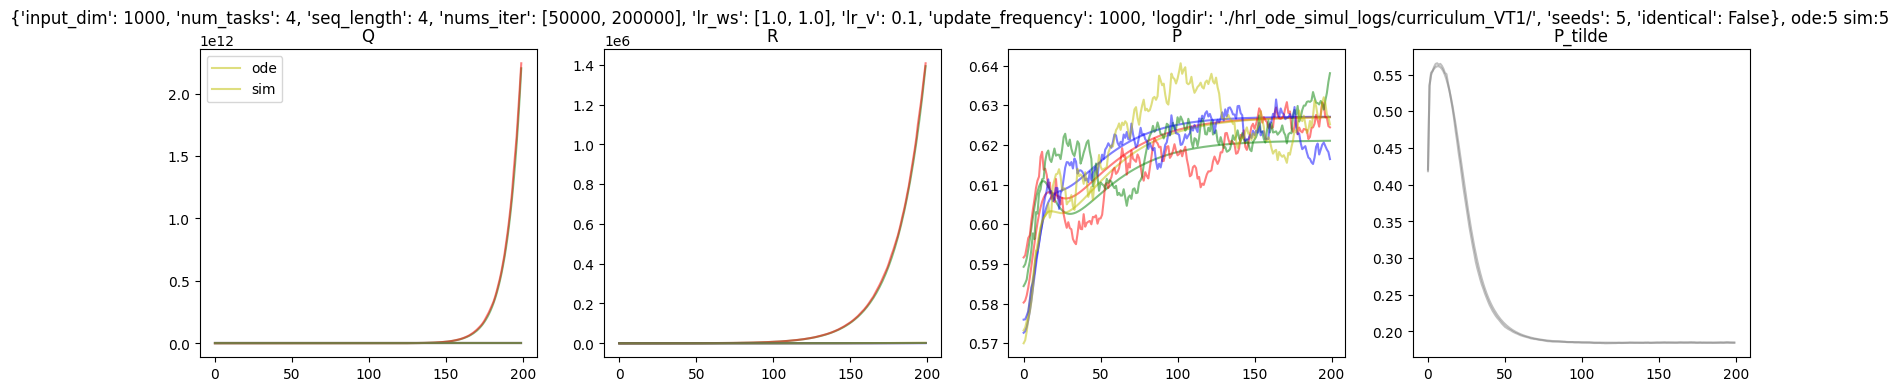

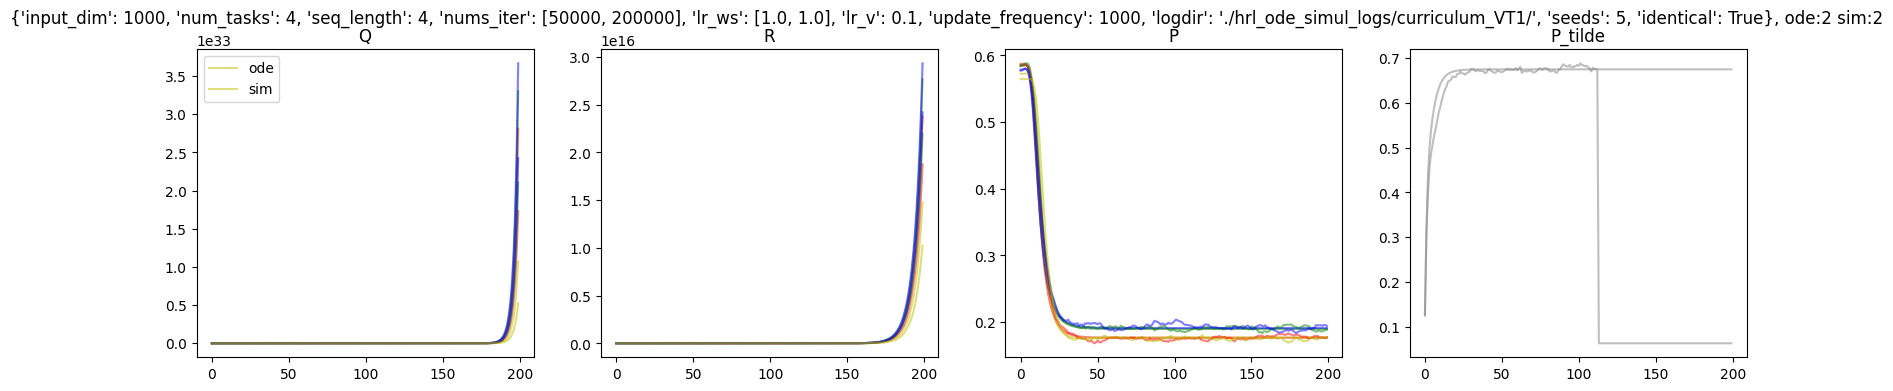

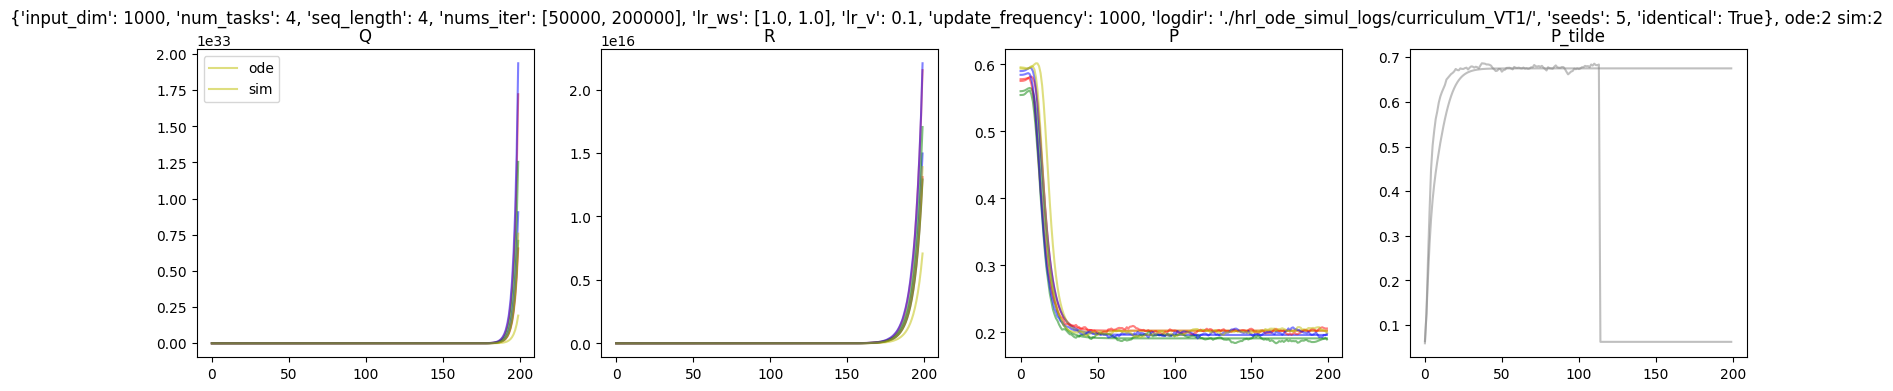

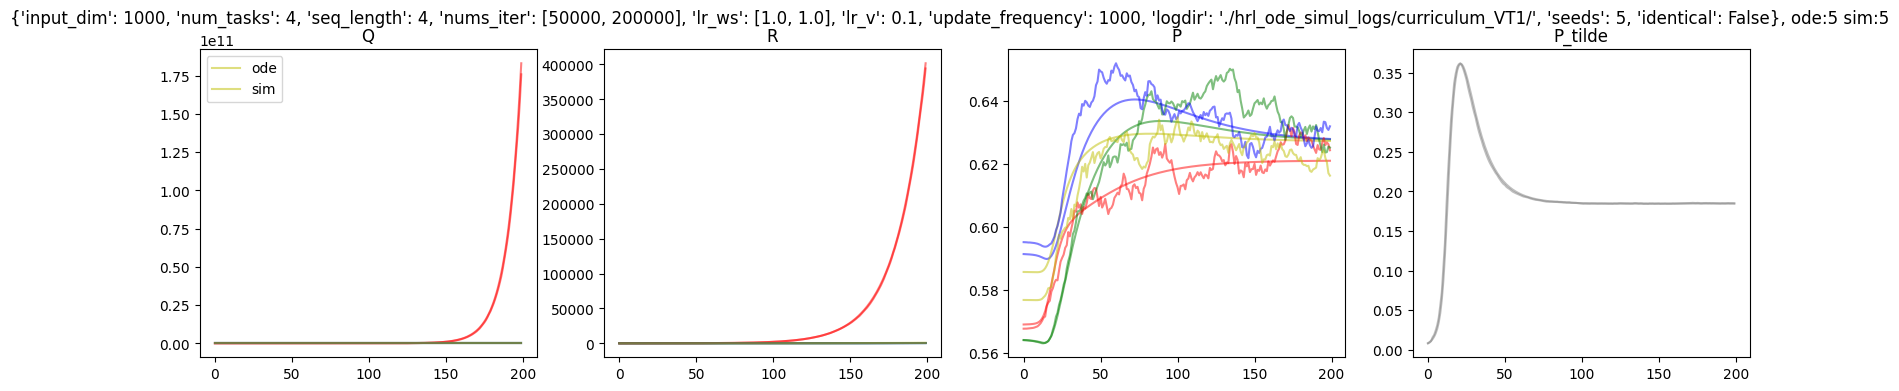

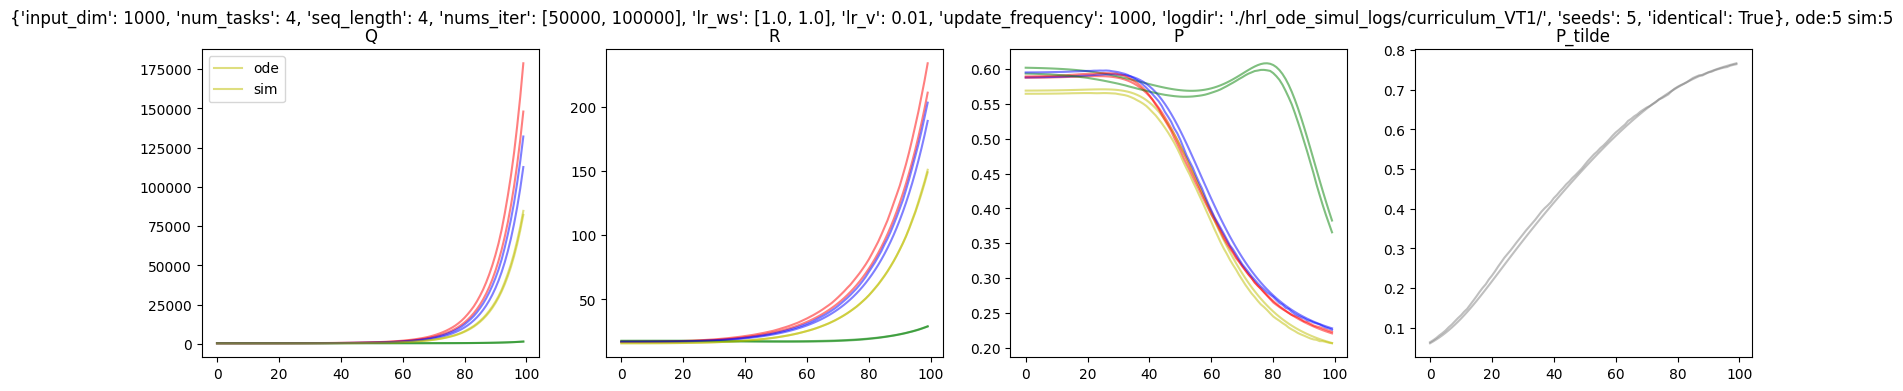

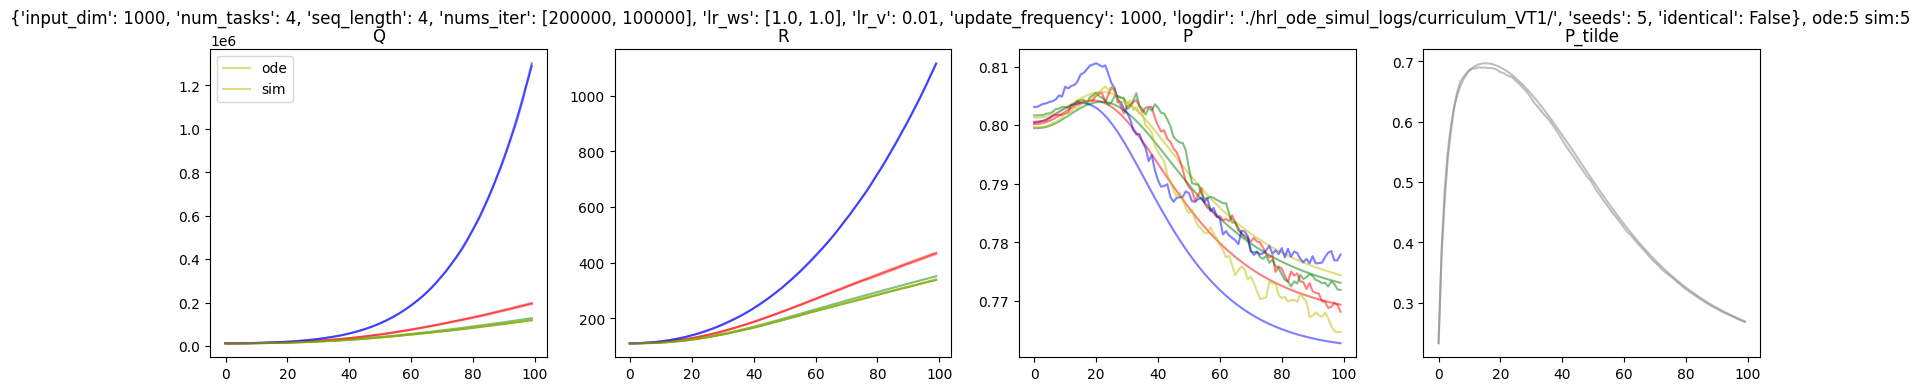

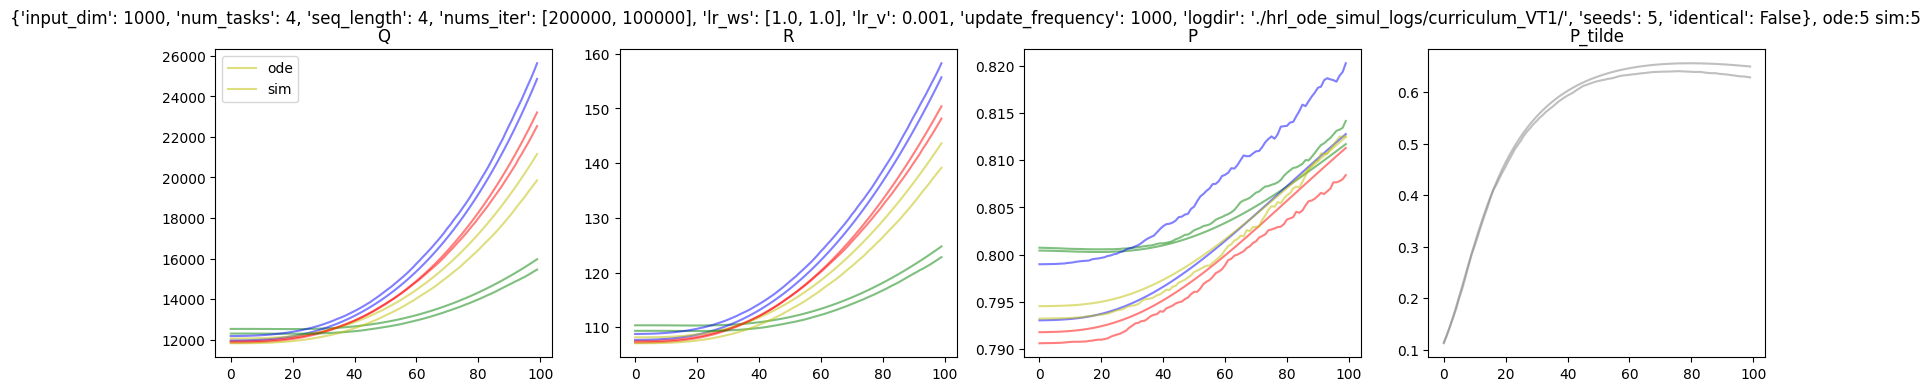

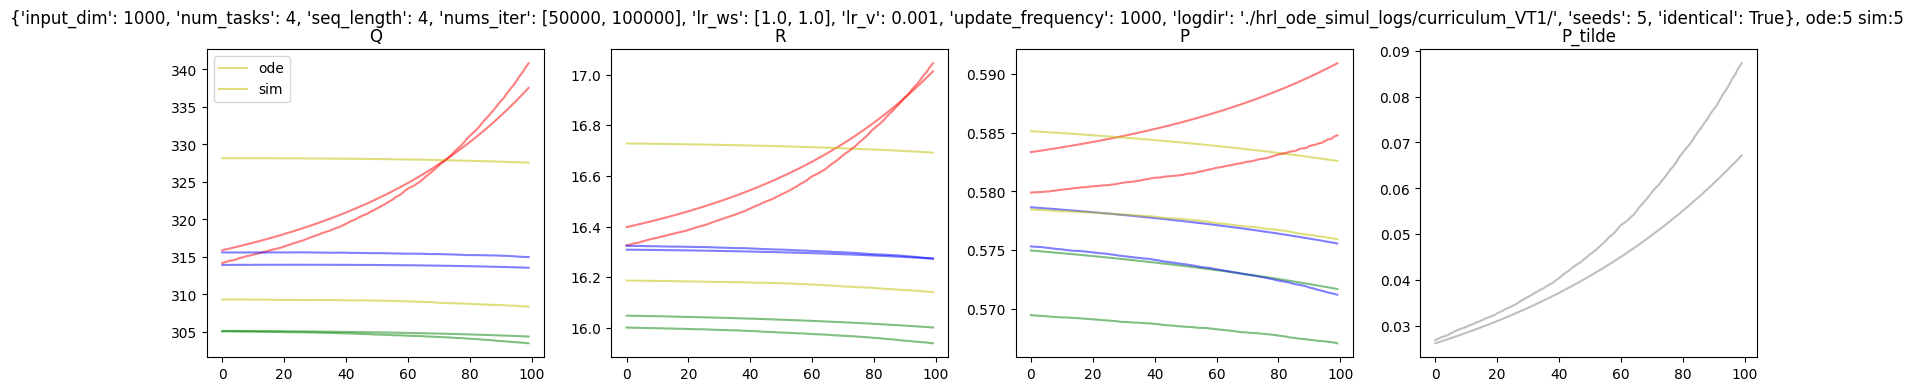

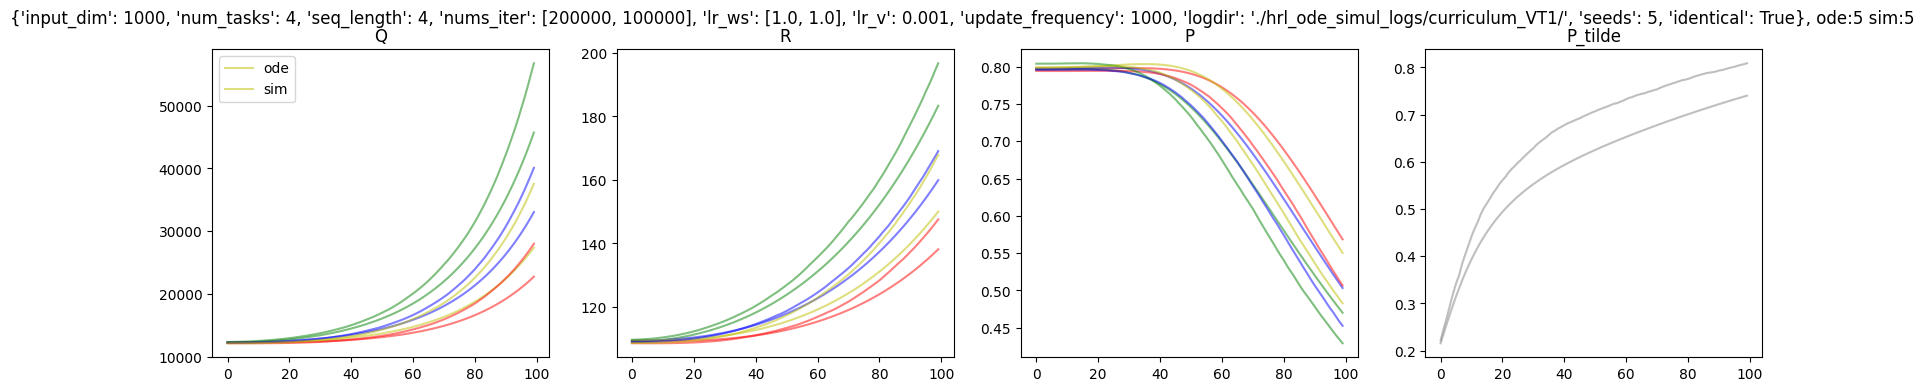

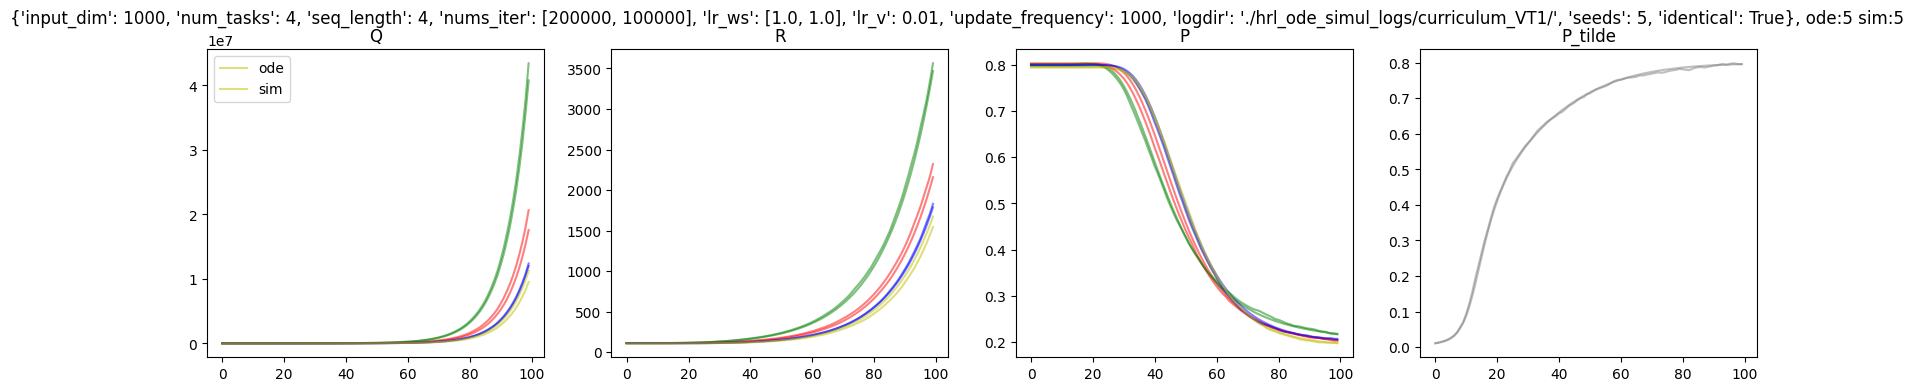

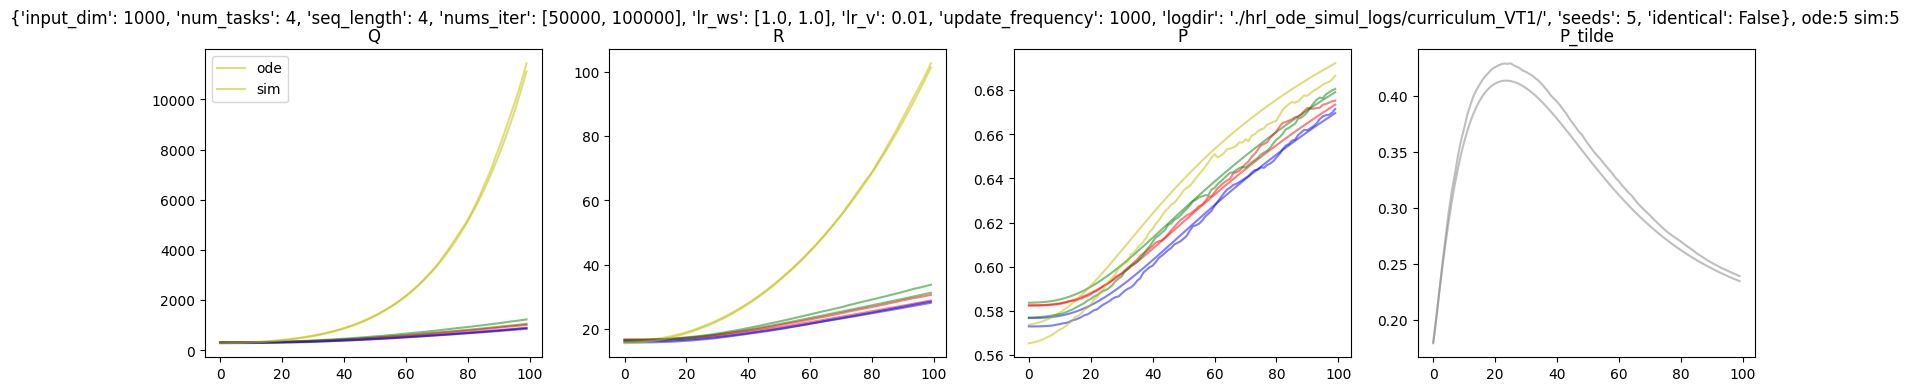

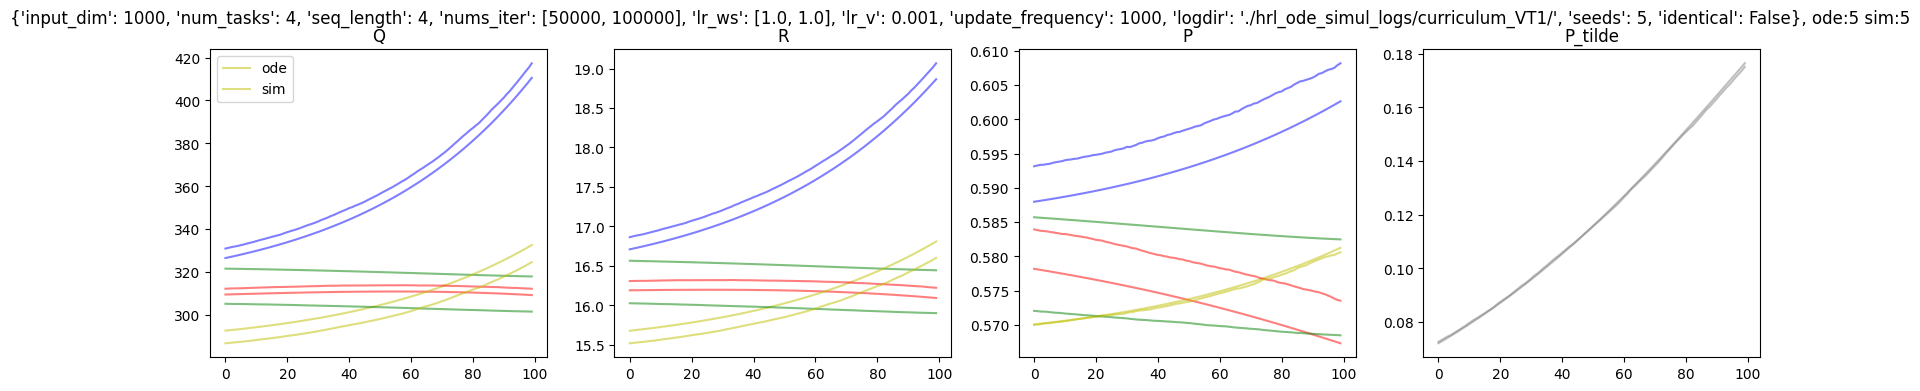

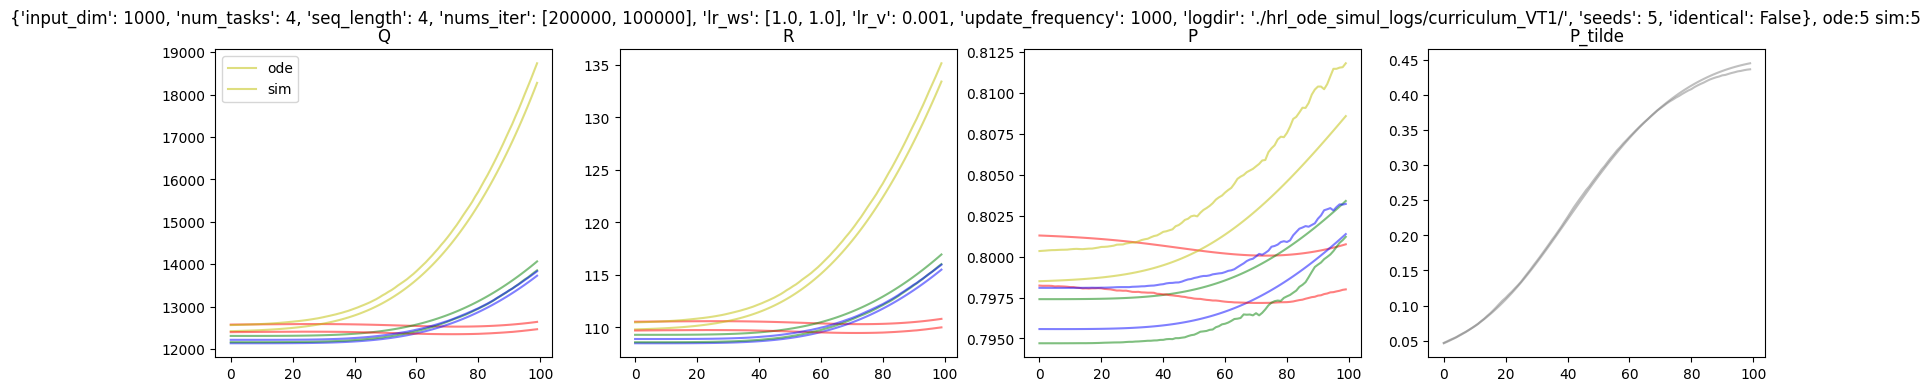

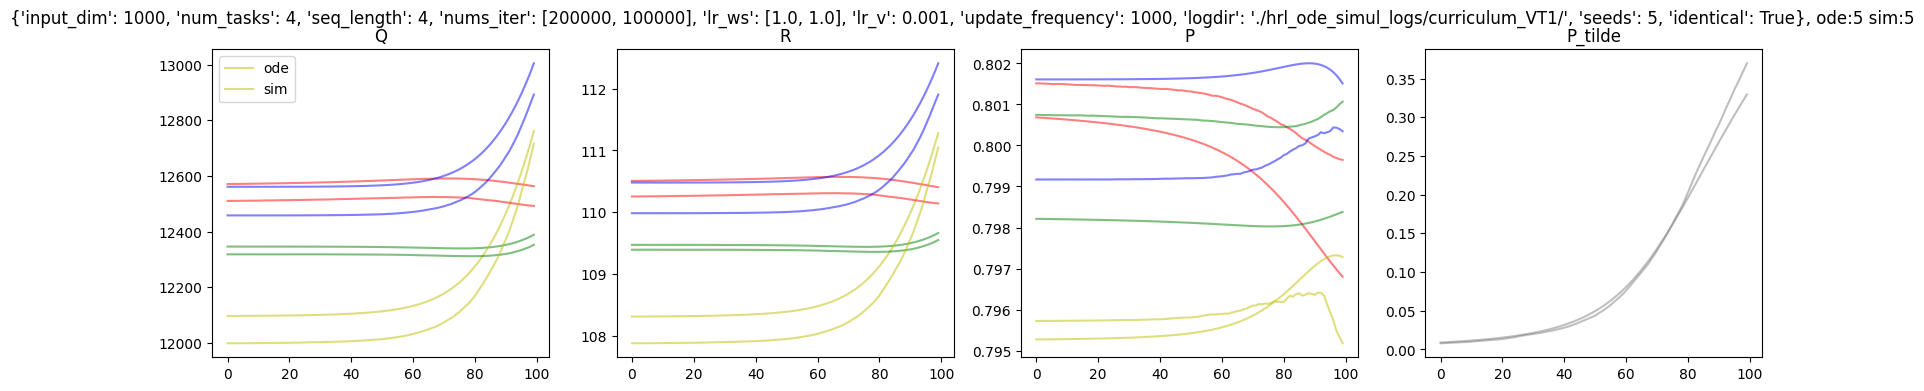

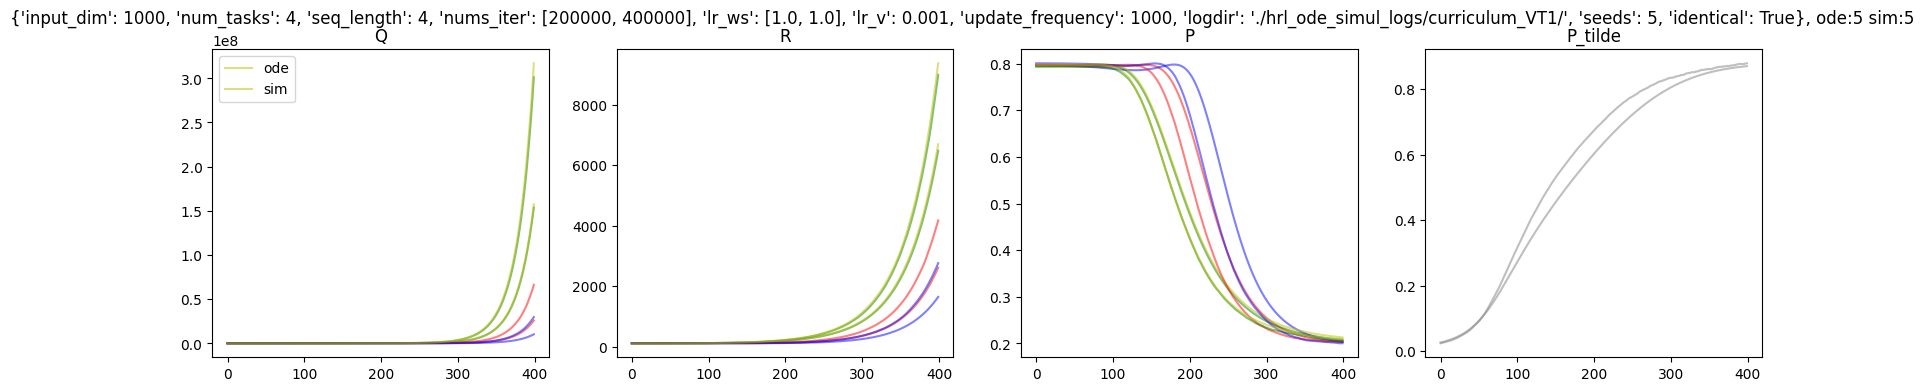

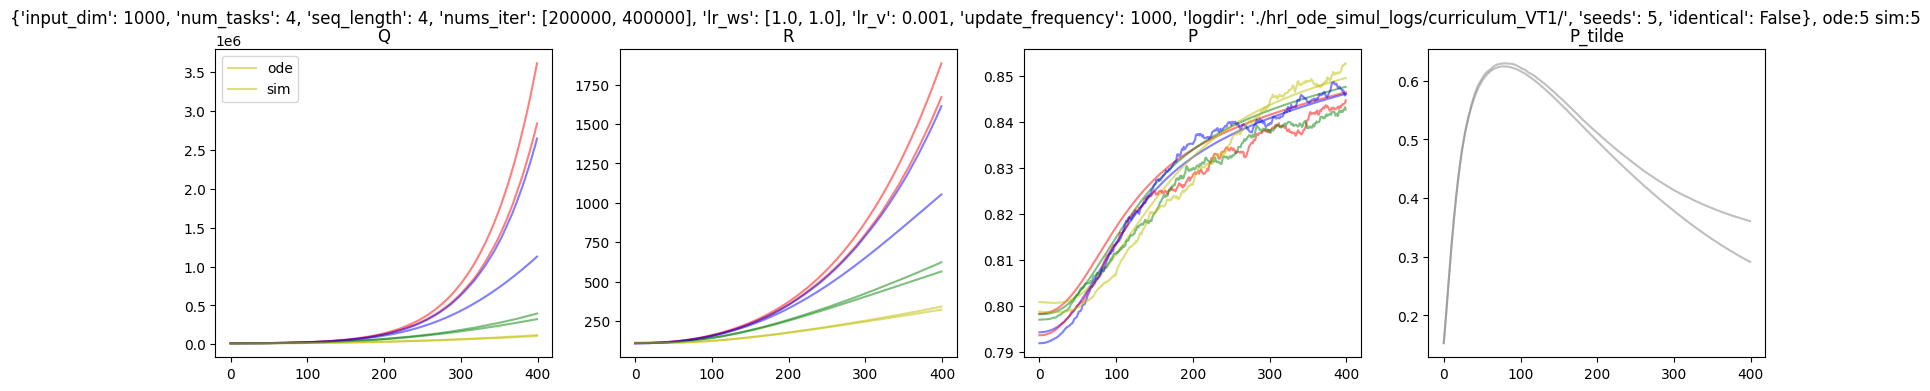

In [17]:
paths=glob.glob('hrl_ode_simul_logs/curriculum_VT1/20230802*')

for p in paths:
    print(p)
    viz_each_seed(p,0)

In [13]:
def load_perturbation_log(path):
    args_path=glob.glob(os.path.join(path, 'perturbation_args.json'))[0]
    args=json.load(open(args_path, 'r'))
    results_perturb=[]
    for p in glob.glob(os.path.join(path, f'perturbation_*.jl')):
        results_perturb.append(jl.load(p))
    return args, results_perturb 

def viz_perturbation(logpath, k):
    args, results_perturb = load_perturbation_log(logpath)
    
    def _get_data(result):
        Qmat=result['phase2']['Q']
        Rmat=result['phase2']['R']
        Pmat=result['phase2']['P']
        Vmat=result['phase2']['P']
        P_tildemat = result['phase2']['P_tilde']

        QS = [[k[n][n] for k in Qmat] for n in range(4)]
        RS = [[k[n][n] for k in Rmat] for n in range(4)]
        PS = [[k[n] for k in Pmat]for n in range(4)]
        VS = [[k[n] for k in Vmat]for n in range(4)]
        
        return QS, RS, PS, VS, P_tildemat
    
    fig = plt.figure(figsize=(20,4))
    plt.suptitle(f"{args}")
    ax1 = plt.subplot(141)
    ax2 = plt.subplot(142)
    ax3 = plt.subplot(143)
    ax4 = plt.subplot(144)
    cs=['r','g', 'b', 'y', 'cyan', 'magenta']
    _line = None
    QS_list = []
    RS_list = []
    PS_list = []
    VS_list = []
    Ptilde_list = []
    for result in results_perturb:
        QS, RS, PS, VS, P_tildemat = _get_data(result)
        QS_list.append(QS)
        RS_list.append(RS)
        PS_list.append(PS)
        VS_list.append(VS)
        Ptilde_list.append(P_tildemat)
    for i in range(len(results_perturb)):
        c=cs[i]
        _line, =ax1.plot(QS_list[i][k], label = 'after perturbation', c = c, alpha = 0.5)
        ax2.plot(RS_list[i][k], label = 'after perturbation', c = c, alpha = 0.5)
        ax3.plot(np.power(PS_list[i][k],4), label = 'after perturbation', c = c, alpha = 0.5)
        ax4.plot(np.power(Ptilde_list[i],4), label = 'after perturbation', c= c, alpha=0.5)

    ax1.set_title(f'Q')
    ax2.set_title(f'R')
    ax3.set_title(f'P')
    ax4.set_title(f'P_tilde')
    
    if _line is not None:
        ax1.legend(handles=[_line])

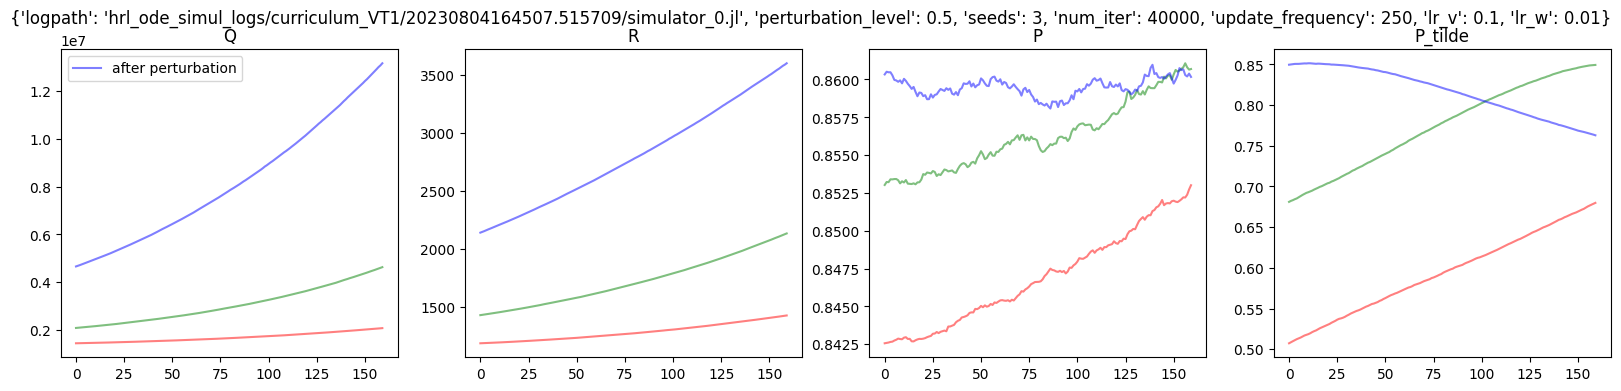

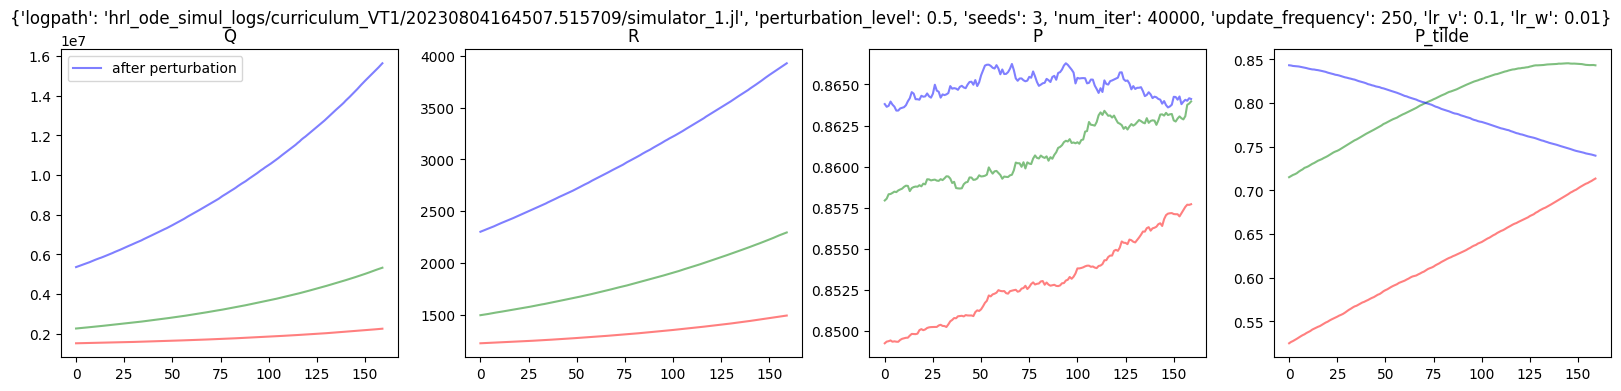

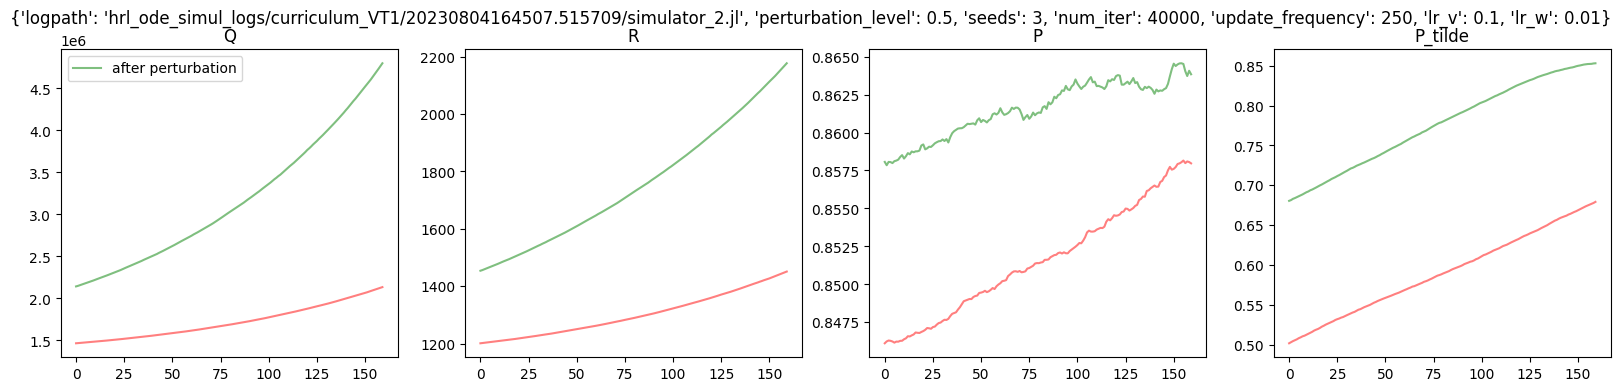

In [16]:
paths=glob.glob('hrl_ode_simul_logs/curriculum_VT1/20230804164507.515709/20230808103*')

for p in paths:
    if len(glob.glob(f'{p}/*')) != 0: 
        viz_perturbation(p,0)

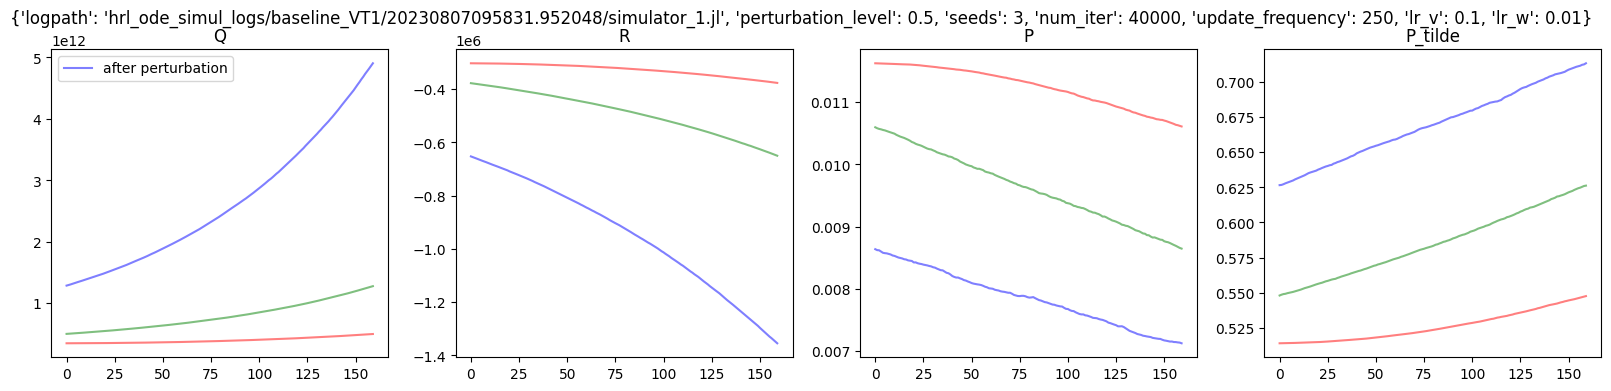

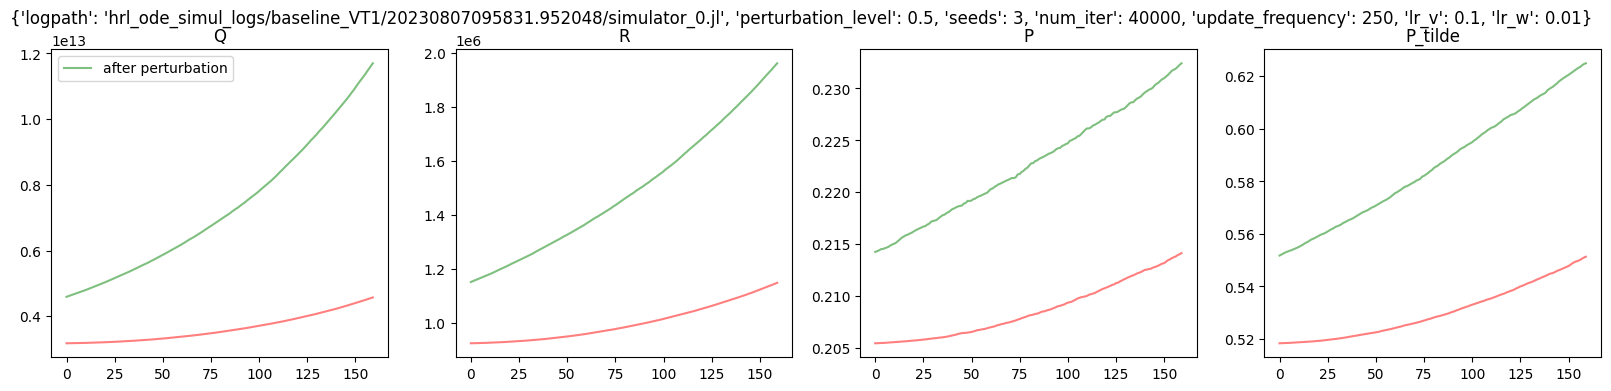

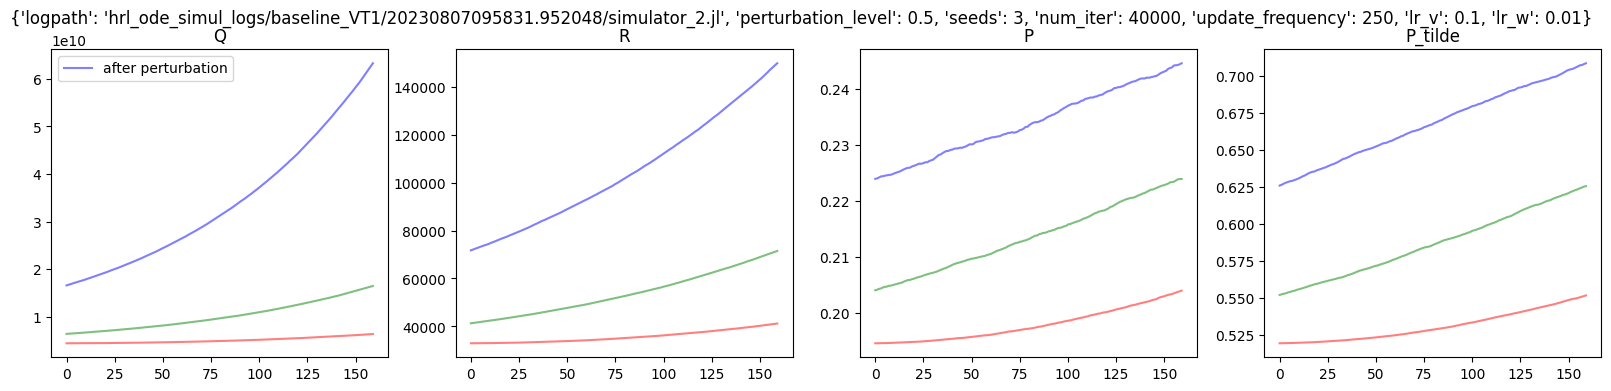

In [17]:
paths=glob.glob('hrl_ode_simul_logs/baseline_VT1/20230807095831.952048/202308081038*/')

for p in paths:
    if len(glob.glob(f'{p}/*')) != 0: 
        viz_perturbation(p,0)